# Population Generator & Screening Simulator

In [1]:
# @title General Settings
import ipywidgets as widgets
from IPython.display import display

# Initialise default values
default_start_year = 1700
default_end_year = 2023
default_age_gap = 10

Latest_Family_ID = 0
IDs = []
IDs.extend(range(Latest_Family_ID + 1, 2*10**6))

# Update years and gap values
def update_all_values(start_year_value, end_year_value, age_gap_value):
    global start_year, end_year, age_gap
    start_year = start_year_value
    end_year = end_year_value
    age_gap = [-age_gap_value, age_gap_value]

# Ensure that start year is not after end year
def validate_start_year(change):
    if start_year_input.value > end_year_input.value:
        start_year_input.value = end_year_input.value

# Ensure that end year is not before start year
def validate_end_year(change):
    if end_year_input.value < start_year_input.value:
        end_year_input.value = start_year_input.value

# Handle the update button click event
def handle_update(_):
    update_all_values(start_year_input.value, end_year_input.value, age_gap_input.value)
    
    # Check if sliders are defined and then adjust the slider values
    if 'start_value_slider' in globals() and 'end_value_slider' in globals():
        start_value_slider.value = default_min_value
        end_value_slider.value = default_max_value

# Create the update button and bind the click event to the handler
update_button = widgets.Button(description="Update")
update_button.on_click(handle_update)

widget_width = '200px' 
label_padding = '4px' 

# Create custom HTML descriptions for the labels
start_year_label = widgets.HTML('Start Year:')
end_year_label = widgets.HTML('End Year:')
age_gap_label = widgets.HTML('Couple Age Gap Range:')

# Create the input boxes
start_year_input = widgets.IntText(value=default_start_year, layout=widgets.Layout(width=widget_width))
end_year_input = widgets.IntText(value=default_end_year, layout=widgets.Layout(width=widget_width))
age_gap_input = widgets.IntText(value=default_age_gap, layout=widgets.Layout(width=widget_width))

# Add observers for start year and end year validation
start_year_input.observe(validate_start_year, 'value')
end_year_input.observe(validate_end_year, 'value')

# Arrange labels and input boxes horizontally
start_year_row = widgets.HBox([start_year_label, start_year_input])
end_year_row = widgets.HBox([end_year_label, end_year_input])
age_gap_row = widgets.HBox([age_gap_label, age_gap_input])

# Creating interact UI
ui = widgets.VBox([
    start_year_row,
    end_year_row,
    age_gap_row,
    update_button
])

out = widgets.interactive_output(update_all_values,
                                 {'start_year_value': start_year_input,
                                  'end_year_value': end_year_input,
                                  'age_gap_value': age_gap_input})

display(ui)


# Generation Zero - Population structure

In [2]:
# @title Generation Zero - Population Structure
## # Input data

y = [31543, 31543, 31543, 31543, 31092, 31092, 31092, 31092, 31092,
       31092, 31092, 31092, 26627, 26627, 26627, 26627, 26627, 24791,
       24791, 24791, 24184, 24184, 24184, 24184, 24184, 20300, 20300,
       20300, 20300, 20300, 16824, 16824, 16824, 16824, 16824, 16824,
       16824, 16824, 16824, 16824, 16824, 16824, 16824, 16824, 16824,
       16176, 16176, 16176, 16176, 16176, 16176, 16176, 16176, 16176,
       16176, 16176, 16176, 16176, 16176, 16176, 14900, 14900, 14900,
       14900, 14900, 11856, 11856, 11856, 11856, 11856,  3445,  3445,
        3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,
        3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,
        3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,
        3445,  3445]

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, FloatSlider, FloatText, Button, VBox, HBox, Label

# Function definitions

def heaviside(x, a, c, k):
    return np.maximum(a + np.exp((-k*x) + (k*c)), 0)

def plot_heaviside(a, c, k):
    x = np.arange(len(y))
    y_fit = heaviside(x, a, c, k)

    y_scaled = np.array(y)*0.001
    y_fit_scaled = y_fit*0.001

    fig, ax = plt.subplots()
    #ax.bar(x, y_scaled, width=0.8, color='black', edgecolor='black', label='Example data')
    ax.plot(x, y_fit_scaled, color='red', label='fit')
    ax.set_xlabel('Age (years)', fontsize=12)
    ax.set_ylabel('Population size', fontsize=12)
    ax.legend()
    plt.show()

    global f_ages
    f_ages = y_fit_scaled.astype(int)

# Sliders and input fields
a_slider = FloatSlider(min=-10000, max=5500, step=1500, value=1274.4646464646464, description='a')
c_slider = FloatSlider(min=485, max=530, step=5, value=515.1515151515152, description='c')
k_slider = FloatSlider(min=0.016, max=0.0210, step=0.00030, value=0.020202020202020204, description='k')

def update_slider_params(change):
    """Update slider parameters based on input fields."""
    a_slider.min, a_slider.max, a_slider.step = a_min.value, a_max.value, a_step.value
    c_slider.min, c_slider.max, c_slider.step = c_min.value, c_max.value, c_step.value
    k_slider.min, k_slider.max, k_slider.step = k_min.value, k_max.value, k_step.value

# Input fields to manually set min, max, and step of sliders
a_min, a_max, a_step = FloatText(value=-10000), FloatText(value=5500), FloatText(value=1500)
c_min, c_max, c_step = FloatText(value=485), FloatText(value=530), FloatText(value=5)
k_min, k_max, k_step = FloatText(value=0.016), FloatText(value=0.0210), FloatText(value=0.00030)

# Set up a button to update the slider parameters
update_button = Button(description="Update Sliders")
update_button.on_click(update_slider_params)

# Displaying widgets
input_fields = VBox([
    HBox([Label('a min:'), a_min, Label('a max'), a_max, Label('a steps'), a_step]),
    HBox([Label('c min:'), c_min, Label('c max'), c_max, Label('c steps'), c_step]),
    HBox([Label('k min:'), k_min, Label('k max'), k_max, Label('k steps'), k_step]),
    update_button
])

display(input_fields)
interact(plot_heaviside, a=a_slider, c=c_slider, k=k_slider);


interactive(children=(FloatSlider(value=1274.4646464646464, description='a', max=5500.0, min=-10000.0, step=15…

In [3]:
# @title Default title text

# Define the default values for min, max, and step
default_min_value = 100000
default_max_value = 3000000
default_step_value = 10000

# Original default values
start_value_default = 1236050
end_value_default = 1903100

# Update the plot based on start_value and end_value
def plot_values(start_value, end_value):

    x = np.arange(start_year, end_year+1, 1)
    y = np.linspace(start_value, end_value, len(x))
    plt.plot(x, y, color='gold', linewidth=5)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total population', fontsize=14)
    plt.xlim(start_year, end_year)
    plt.ylim(0, max(start_value, end_value) + 100000)
    plt.show()
    global outout
    outout = [x, y]

# Create boxes for user-defined min, max, and step
min_value_box = widgets.FloatText(
    value=default_min_value,
    description='Min:',
    continuous_update=False
)

max_value_box = widgets.FloatText(
    value=default_max_value,
    description='Max:',
    continuous_update=False
)

step_value_box = widgets.FloatText(
    value=default_step_value,
    description='Step:',
    continuous_update=False
)

# Create the slider widgets for start_value and end_value
start_value_slider = widgets.FloatSlider(
    value=start_value_default,
    min=min_value_box.value,
    max=max_value_box.value,
    step=step_value_box.value,
    description='Start Value:',
    orientation='horizontal'
)

end_value_slider = widgets.FloatSlider(
    value=end_value_default,
    min=min_value_box.value,
    max=max_value_box.value,
    step=step_value_box.value,
    description='End Value:',
    orientation='horizontal'
)

# Update the slider ranges
def update_slider_ranges(change):
    start_value_slider.min = min_value_box.value
    start_value_slider.max = max_value_box.value
    start_value_slider.step = step_value_box.value

    end_value_slider.min = min_value_box.value
    end_value_slider.max = max_value_box.value
    end_value_slider.step = step_value_box.value

# Define a function to update sliders when the "Update Sliders" button is clicked
def update_sliders(_):
    update_slider_ranges(None)

# Create the "Update Sliders" button
update_sliders_button = widgets.Button(description="Update Sliders")
update_sliders_button.on_click(update_sliders)

# Initialize the global variable output
outout = []

# Display widgets
widgets.VBox([
    widgets.HBox([min_value_box, max_value_box, step_value_box]),
    update_sliders_button,
    widgets.interactive(plot_values, start_value=start_value_slider, end_value=end_value_slider)
])


In [4]:
# @title
Interpolated_Population = []

for i in range(0, len(outout[0])):
    Interpolated_Population.append([outout[0][i], int(outout[1][i])])

In [5]:
# @title 1. Age-matched Birth Proportions
from scipy.optimize import curve_fit
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


# Define the function to be optimized (Gaussian distribution)
def gaussian(x, A, k, c):
    return A * np.exp(-(x - c)**2 / (2 * k**2))

# Load the data
y = [220., 220., 220., 220., 220., 770.4, 770.4, 770.4,
     770.4, 770.4, 1416.4, 1416.4, 1416.4, 1416.4, 1416.4, 1622.8,
     1622.8, 1622.8, 1622.8, 1622.8, 835.2, 835.2, 835.2, 835.2,
     835.2, 189., 189., 189., 189., 189.]

# Define the independent variable
x = np.arange(len(y))

# Fit the curve to the data
p0 = [max(y), np.mean(y), np.std(y)]
popt, pcov = curve_fit(gaussian, x, y, p0)

# Get the optimal parameters
A_gaussian, k_gaussian, c_gaussian = popt

# Define the sliders as integers
A_slider = widgets.IntSlider(min=100, max=int(A_gaussian+2000), step=200, value=int(A_gaussian), description='A')
k_slider = widgets.IntSlider(min=1, max=int(max(k_gaussian, 1)), step=1, value=int(max(k_gaussian, 1)), description='k')
c_slider = widgets.IntSlider(min=6, max=22, step=2, value=int(c_gaussian), description='c')

global Estimated_Yearly_Distribution
Estimated_Yearly_Distribution = []

# Define the function to update the plot
def update_plot(A, k, c):
    global Estimated_Yearly_Distribution

    y_updated = gaussian(x, A, k, c)
    plt.plot(x, y_updated, color='lime', linewidth=6, alpha=0.8, label='fitted\ndistribution')

    # Set the tick positions and labels
    tick_positions = [0, 5, 10, 15, 20, 25, 29]
    tick_labels = ['<20', '20', '25', '30', '35', '40', '>40']
    plt.xticks(tick_positions, tick_labels)
    plt.xlim(0, 29)
    plt.xlabel("Age (Years)", fontsize=14)
    plt.ylabel("Births", fontsize=14)
    plt.show()

    Estimated_Yearly_Distribution = [[i+15, value] for i, value in enumerate(y_updated)]

# Function to update slider parameters based on input fields
def update_slider_params(change):
    A_slider.min, A_slider.max, A_slider.step = int(A_min.value), int(A_max.value), int(A_step.value)
    k_slider.min, k_slider.max, k_slider.step = int(k_min.value), int(k_max.value), int(k_step.value)
    c_slider.min, c_slider.max, c_slider.step = int(c_min.value), int(c_max.value), int(c_step.value)

# Input fields to manually set min, max, and step of sliders
A_min, A_max, A_step = widgets.IntText(value=100), widgets.IntText(value=int(A_gaussian+2000)), widgets.IntText(value=200)
k_min, k_max, k_step = widgets.IntText(value=1), widgets.IntText(value=int(max(k_gaussian, 1))), widgets.IntText(value=1)
c_min, c_max, c_step = widgets.IntText(value=6), widgets.IntText(value=22), widgets.IntText(value=2)

# Set up a button to update the slider parameters
update_button = widgets.Button(description="Update Sliders")
update_button.on_click(update_slider_params)

# Displaying widgets for slider adjustments
input_fields = widgets.VBox([
    widgets.HBox([widgets.Label('A min:'), A_min, widgets.Label('A max'), A_max, widgets.Label('A step'), A_step]),
    widgets.HBox([widgets.Label('k min:'), k_min, widgets.Label('K max'), k_max, widgets.Label('k step'), k_step]),
    widgets.HBox([widgets.Label('c min:'), c_min, widgets.Label('C max'), c_max, widgets.Label('c step'), c_step]),
    update_button
])

display(input_fields)

# Create the widget and display it
widget = widgets.interactive(update_plot, A=A_slider, k=k_slider, c=c_slider)
display(widget)

def get_estimated_yearly_distribution():
    A = A_slider.value
    k = k_slider.value
    c = c_slider.value

    y_updated = gaussian(x, A, k, c)

    return [[i+15, value] for i, value in enumerate(y_updated)]


interactive(children=(IntSlider(value=1612, description='A', max=3612, min=100, step=200), IntSlider(value=6, …

In [6]:
# @title 3. Life Expectancy
def normalise(numbers):
    """
    Normalises a list of numbers by dividing each number by the sum of the numbers.
    """
    total = sum(numbers)
    normalised_numbers = [num/total for num in numbers]
    return normalised_numbers

y = np.array([938, 57, 30, 22, 19, 14, 17, 13, 10, 9, 6, 9, 9, 8, 12, 11, 16, 14, 17, 16, 16, 17, 18, 20, 20, 22, 17, 15, 21, 20, 35, 20, 25, 33, 24, 36, 28, 30, 37, 42, 43, 44, 62, 77, 85, 81, 78, 67, 90, 93, 126, 117, 143, 142, 157, 174, 177, 189, 183, 214, 227, 200, 233, 247, 262, 332, 300, 333, 340, 366, 425, 341, 440, 480, 487, 518, 557, 469, 497, 460, 550, 377, 409, 360, 416, 335, 307, 216, 196, 160, 132, 84, 76, 62, 34, 31, 17, 15, 17, 6, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y1 = [  2,   2,   3,   1,   2,   3,   0,   3,   1,   1,   1,   2,   2,
         3,   4,   2,  14,   9,  18,   6,  16,  17,  12,  15,  13,  14,
        18,  16,  20,  11,  23,  26,  20,  21,  31,  27,  29,  33,  29,
        33,  31,  29,  35,  35,  45,  52,  44,  64,  71,  85,  76,  90,
        79, 106, 127, 127, 147, 160, 158, 158, 174, 204, 194, 212, 185,
       217, 251, 250, 255, 300, 339, 365, 401, 400, 402, 455, 509, 467,
       494, 500, 540, 569, 650, 626, 629, 618, 652, 592, 588, 530, 523,
       445, 400, 343, 281, 232, 157, 138,  74,  48,  38,  18,  16,   9,
         4,   4,   1,   0,   0,   0,   0,   0,   0,   0, 0, 0]
y_norm = normalise(y)
y1_norm = normalise(y1)

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the function to be optimized
def f(A, k, c, b):
    y_gaussian = A*np.exp(-k*(x-c)**2)
    y_exponential = np.exp(-b*x)
    y_pred = y_gaussian + y_exponential
    mse = np.mean((y-y_pred)**2)
    return mse

# Define the independent variable
x = np.arange(len(y))

# Define the bounds for each parameter
varbound = np.array([[0, 1000], [0, 0.02], [0, 150], [0, 2]])

t = [4.73635514e+02, 3.97005304e-03, 7.41218030e+01, 9.99987447e-01]

# Define the sliders for each parameter
# previous value=t[0] [1],[2] etc
slider_A = widgets.FloatSlider(min=100, max=varbound[0][1], step=100, value=600, description='A')
slider_k = widgets.FloatSlider(min=0.002, max=0.010, step=0.001, value=0.004, description='k')
slider_c = widgets.FloatSlider(min=30, max=100, step=10, value=80, description='c')
slider_b = widgets.FloatSlider(min=0.2, max=1, step=0.1, value=0.4, description='b')

# Define the function to update the plot
def update_plot(slider_A, slider_k, slider_c, slider_b):

    global death_distribution

    A = slider_A
    k = slider_k
    c = slider_c
    b = slider_b

    y_gaussian = A*np.exp(-k*(x-c)**2)
    y_exponential = np.exp(-b*x)
    y_pred = y_gaussian + y_exponential

    y_pred_norm = normalise(y_pred)

    mse = f(A, k, c, b)

    plt.clf()
    #plt.plot(x, y_norm, 'bo', alpha=0.5, label='Example Data (1955)')
    #plt.plot(x, y1_norm, 'go', alpha=0.5, label='Example Data (2021)')
    plt.plot(x, y_pred_norm, 'r-', label='Fit')
#     plt.title(f'MSE = {mse:.2f}')
    #plt.title(f'Life Expectancy')
    plt.xlabel('Age at death (years)', fontsize=12)
    plt.ylabel('Deaths', fontsize=12)
    plt.legend()
    plt.show()

    # Return the fitted curve
    death_distribution = y_pred

    return death_distribution

# Create the interactive plot
widget = widgets.interactive(update_plot, slider_A=slider_A, slider_k=slider_k, slider_c=slider_c, slider_b=slider_b)

def get_death_distribution():
    global death_distribution

    A = slider_A.value
    k = slider_k.value
    c = slider_c.value
    b = slider_b.value

    y_gaussian = A*np.exp(-k*(x-c)**2)
    y_exponential = np.exp(-b*x)
    y_pred = y_gaussian + y_exponential

    death_distribution = y_pred

    return death_distribution

# Display the widget and get the fitted curve
display(widget)
y_pred = widget.result
death_distribution = normalise(y_pred)


interactive(children=(FloatSlider(value=600.0, description='A', max=1000.0, min=100.0, step=100.0), FloatSlide…

In [7]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Data
labels = ['Zero', 'One', 'Two', 'Three+']
colors = ['magenta', 'orange', 'cyan', 'lime']

# Create initial data
initial_sizes = [40.8, 34.7, 16.3, 8.2]

global my_list_pie
my_list_pie = initial_sizes

# Default values for the integrated widgets
default_reference_year = 2012
default_reference_female_population = 25269
default_total_female_population_reference = 374500 

widget_width = '200px' 
label_padding = '4px' 

# Create pie chart
def update_chart(Zero1, One, Two, Three, ref_year, fem_population, total_fem_population_reference):
    global my_list_pie, reference_year, female_population, total_female_population_reference

    reference_year = ref_year
    female_population = fem_population
    total_female_population_reference = total_fem_population_reference

    # Check if any input value is 0 or 100
    if Zero1 == 0 or Zero1 == 100 or One == 0 or One == 100 or Two == 0 or Two == 100 or Three == 0 or Three == 100:
        print('Input values must be between 1 and 99')
        return

    total = Zero1 + One + Two + Three
    sizes = [Zero1 / total * 100, One / total * 100, Two / total * 100, Three / total * 100]

    plt.clf()  # Clear the previous plot

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.show()

    my_list_pie = sizes
    
    global Previous_Births_2012
    Previous_Births_2012 = [['0 births'], ['1 birth'], ['2 births'], ['3 births']]
    for i in range(len(my_list_pie)):
        Previous_Births_2012[i].append(female_population * (my_list_pie[i] / 100))

# Create sliders
Zero1 = widgets.FloatSlider(min=0.1, max=99.9, step=0.1, value=initial_sizes[0], description='0 births', readout_format='.1f')
One = widgets.FloatSlider(min=0.1, max=99.9, step=0.1, value=initial_sizes[1], description='1 birth', readout_format='.1f')
Two = widgets.FloatSlider(min=0.1, max=99.9, step=0.1, value=initial_sizes[2], description='2 births', readout_format='.1f')
Three = widgets.FloatSlider(min=0.1, max=99.9, step=0.1, value=initial_sizes[3], description='3+ births', readout_format='.1f')

# Create input widgets with HTML descriptions
reference_year_label = widgets.HTML(value='<span style="padding:{}">Reference Year:</span>'.format(label_padding))
female_population_label = widgets.HTML(value='<span style="padding:{}">Live Births at reference year:</span>'.format(label_padding))
total_female_population_reference_label = widgets.HTML(value='<span style="padding:{}">Total Female Pop. at Ref Year:</span>'.format(label_padding))

reference_year_input = widgets.IntText(value=default_reference_year, layout=widgets.Layout(width=widget_width))
female_population_input = widgets.IntText(value=default_reference_female_population, layout=widgets.Layout(width=widget_width))
total_female_population_reference_input = widgets.IntText(value=default_total_female_population_reference, layout=widgets.Layout(width=widget_width))

# Arrange labels and input boxes horizontally
reference_year_row = widgets.HBox([reference_year_label, reference_year_input])
female_population_row = widgets.HBox([female_population_label, female_population_input])
total_female_population_reference_row = widgets.HBox([total_female_population_reference_label, total_female_population_reference_input])

# Creating interact UI
ui = widgets.VBox([
    reference_year_row,
    female_population_row,
    total_female_population_reference_row,
    Zero1, One, Two, Three
])

out = widgets.interactive_output(update_chart,
                                 {'Zero1': Zero1,
                                  'One': One,
                                  'Two': Two,
                                  'Three': Three,
                                  'ref_year': reference_year_input,
                                  'fem_population': female_population_input,
                                  'total_fem_population_reference': total_female_population_reference_input})

display(ui, out)


Output()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# @title Total Period Fertility Rate

# Slider settings widgets
TPFR_slider_settings = {
    'min': widgets.FloatText(value=1, description='Min Value:'),
    'max': widgets.FloatText(value=3, description='Max Value:'),
    'step': widgets.FloatText(value=0.01, description='Step:')
}

# Create initial slider widgets with default settings
TPFR_start_slider = widgets.FloatSlider(
    value=2.39,
    description='TPFR Start:',
    orientation='horizontal',
    min=TPFR_slider_settings['min'].value,
    max=TPFR_slider_settings['max'].value
)
TPFR_end_slider = widgets.FloatSlider(
    value=1.87,
    description='TPFR End:',
    orientation='horizontal',
    min=TPFR_slider_settings['min'].value,
    max=TPFR_slider_settings['max'].value
)

# Global variable
TPFR_Estimated = []

# Update Sliders button
update_sliders_button = widgets.Button(description="Update Sliders")

# Function to refresh sliders with new settings
def update_sliders(b):
    TPFR_start_slider.min = TPFR_slider_settings['min'].value
    TPFR_start_slider.max = TPFR_slider_settings['max'].value
    TPFR_start_slider.step = TPFR_slider_settings['step'].value

    TPFR_end_slider.min = TPFR_slider_settings['min'].value
    TPFR_end_slider.max = TPFR_slider_settings['max'].value
    TPFR_end_slider.step = TPFR_slider_settings['step'].value

update_sliders_button.on_click(update_sliders)

# Display the slider settings and the "Update Sliders" button
slider_settings_box = widgets.VBox(list(TPFR_slider_settings.values()) + [update_sliders_button])
display(slider_settings_box)

# Create a function to update the plot when sliders change
def render_plot(TPFR_start, TPFR_end):
    global TPFR_Estimated

    # Assuming you have defined start_year and end_year somewhere
    years = np.arange(start_year, end_year + 1)
    tpfr_values = np.linspace(TPFR_start, TPFR_end, len(years))

    TPFR_Estimated = [[year, tpfr] for year, tpfr in zip(years, tpfr_values)]
    plt.figure(figsize=(7.7, 5))
    plt.clf()  # Clear the plot
    plt.plot(years, tpfr_values, color='red')
    plt.xlim(start_year, end_year + 25)  # Set the x-axis limits
    plt.xticks(np.arange(start_year, end_year + 25, 25))
    plt.ylim(min(0, 3.5), max(0, 3.5) + 0.1)  # Adjust y-axis limits based on TPFR values
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Total period fertility rate", fontsize=12)
    plt.show()

widgets.interact(
    render_plot,
    TPFR_start=TPFR_start_slider,
    TPFR_end=TPFR_end_slider
)


interactive(children=(FloatSlider(value=2.39, description='TPFR Start:', max=3.0, min=1.0), FloatSlider(value=…

<function __main__.render_plot(TPFR_start, TPFR_end)>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display as ipy_display


# @title Live Births

# Slider settings widgets
lb_slider_settings = {
    'min': widgets.FloatText(value=0, description='Min Value:'),
    'max': widgets.FloatText(value=40000, description='Max Value:'),
    'step': widgets.FloatText(value=5000, description='Step:')
}

# Create initial slider widgets with default values AND the settings from lb_slider_settings
lb_start_slider = widgets.FloatSlider(
    value=31188,
    min=lb_slider_settings['min'].value,
    max=lb_slider_settings['max'].value,
    step=lb_slider_settings['step'].value,
    description='Live Births Start:',
    orientation='horizontal'
)
lb_end_slider = widgets.FloatSlider(
    value=22447,
    min=lb_slider_settings['min'].value,
    max=lb_slider_settings['max'].value,
    step=lb_slider_settings['step'].value,
    description='Live Births End:',
    orientation='horizontal'
)

# Global variable
Live_Births_a = []

# Update Sliders button
update_sliders_button = widgets.Button(description="Update Sliders")

# Function to refresh sliders with new settings
def update_sliders(b):
    lb_start_slider.min = lb_slider_settings['min'].value
    lb_start_slider.max = lb_slider_settings['max'].value
    lb_start_slider.step = lb_slider_settings['step'].value

    lb_end_slider.min = lb_slider_settings['min'].value
    lb_end_slider.max = lb_slider_settings['max'].value
    lb_end_slider.step = lb_slider_settings['step'].value

update_sliders_button.on_click(update_sliders)

# Display the slider settings and the "Update Sliders" button
slider_settings_box = widgets.VBox(list(lb_slider_settings.values()) + [update_sliders_button])
display(slider_settings_box)

# Modify this function to update the plot based on the slider values
def update_plot(lb_start, lb_end):
    global Live_Births_a

    years = np.arange(start_year, end_year + 1)
    lb_values = np.linspace(lb_start, lb_end, len(years))

    Live_Births_a = [[year, lb] for year, lb in zip(years, lb_values)]
    plt.figure(figsize=(7.5,5))
    plt.clf()  # Clear the plot
    plt.plot(years, lb_values, color='red')
    plt.xlim(start_year, end_year + 25)  # Set the x-axis limits
    plt.xticks(np.arange(start_year, end_year + 25, 25))
    plt.ylim(0, lb_end_slider.max + 10000)  # Adjust y-axis limits based on the lb_end_slider's max value
    plt.xlabel("Years", fontsize=14)
    plt.ylabel("Live Births", fontsize=14)
    plt.show()

widgets.interact(
    update_plot,
    lb_start=lb_start_slider,
    lb_end=lb_end_slider
)


interactive(children=(FloatSlider(value=31188.0, description='Live Births Start:', max=40000.0, step=5000.0), …

<function __main__.update_plot(lb_start, lb_end)>

# Select names of csv files

In [10]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import os
import csv
import webbrowser 


# Global variables to store folder path and button reference
output_folder = 'output_data'
button_generate = None  # Placeholder for the generate button reference
population_list_path = ''  # Initialize as empty string
couple_list_path = ''  # Initialize as empty string
population_list_name = ''  # Initialize as empty string
couple_list_name = ''  # Initialize as empty string

error_message = widgets.HTML(value='', layout=widgets.Layout(visibility='hidden'))
update_message = widgets.HTML(value='', layout=widgets.Layout(visibility='hidden'))

# Define the CSS style for the error message (change 'font-size' to your preferred size)
error_style = 'color: red; font-size: 16px;'

# Input widgets for population list and couple list names
population_list_input = widgets.Text(value='', placeholder='Enter population list name', description='Population List:')
couple_list_input = widgets.Text(value='', placeholder='Enter couple list name', description='Couple List:')

# Submit Names button to handle name submission
submit_button = widgets.Button(description="Submit Names", disabled=True)  # Initially disabled

def on_text_input_change(change):
    # Event handler to check if both text inputs have non-empty values
    population_name = population_list_input.value
    couple_name = couple_list_input.value
    
    if population_name and couple_name:
        # Both inputs have non-empty values, enable the "Submit Names" button
        submit_button.disabled = False
    else:
        # At least one input is empty, disable the "Submit Names" button
        submit_button.disabled = True

# Attach the event handler to text input widgets
population_list_input.observe(on_text_input_change, names='value')
couple_list_input.observe(on_text_input_change, names='value')

def on_button_click(button):
    global output_folder, button_generate, population_list_path, couple_list_path, population_list_name, couple_list_name
    if button == submit_button:
        # Handle submission of names
        population_list_name = population_list_input.value
        couple_list_name = couple_list_input.value
        
        if population_list_name == couple_list_name:
            # Display an error message with the defined style
            error_message.value = f'<div style="{error_style}">Error: Population list and couple list names cannot be the same.</div>'
            error_message.layout.visibility = 'visible'
        else:
            # Use the user-specified values as file paths
            output_folder = 'output_data'
            population_list_path = os.path.join(output_folder, population_list_name + '.csv')
            couple_list_path = os.path.join(output_folder, couple_list_name + '.csv')
            
            # Create the output folder if it doesn't exist
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)
            
            # Hide the error message when the names are updated and not equal
            error_message.layout.visibility = 'hidden'
            
            # Enable the "Generate" button after successful submission
            if button_generate:  # Check if button_generate has been initialized
                button_generate.disabled = False

submit_button.on_click(on_button_click)

# Create input box and button for the simulation
text = widgets.IntText(value=45, description='Number of Cycles:')
button_generate = widgets.Button(description="Generate", disabled=True)
output = widgets.Output()  # Create an output widget for displaying messages

def generate_population(button):
    global output_folder
    runs = text.value
    
    for i in range(runs):
        r_count = i + 1
        c_out = Generate_Population(r_count, runs)
        GenerationsList = c_out[0]
        Matched_List = c_out[1]

        # Append data to CSV
        with open(population_list_path, 'a', newline='') as f_population:
            csv_writer_population = csv.writer(f_population)
            csv_writer_population.writerows(GenerationsList)
    
        with open(couple_list_path, 'a', newline='') as f_couple:
            csv_writer_couple = csv.writer(f_couple)
            csv_writer_couple.writerows(Matched_List)
        
        with output:
            print(f"Finished for cycle: {r_count}")

    # After the simulation, display download links as buttons
    with output:
        clear_output(wait=True)
        download_population_button = f'<a download="{population_list_name}.csv" href="{population_list_path}" target="_blank"><button>Download Population List</button></a>'
        download_couple_button = f'<a download="{couple_list_name}.csv" href="{couple_list_path}" target="_blank"><button>Download Couple List</button></a>'
        display(HTML(download_population_button))
        display(HTML(download_couple_button))
        print("All tasks completed! Click the buttons to download files.")

button_generate.on_click(generate_population)

# Display the input and button for the simulation
ui = widgets.VBox([population_list_input, couple_list_input, submit_button, text, button_generate, error_message, update_message, output])
display(ui)




Generation 1
Cycle 1 of 30, Generation 1 of 9 matched



Time taken = 0.03 mins

Generation 2
Cycle 1 of 30, Generation 2 matched



Time taken = 0.04 mins

Generation 3
Cycle 1 of 30, Generation 3 matched



Time taken = 0.06 mins

Generation 4
Cycle 1 of 30, Generation 4 matched



Time taken = 0.07 mins

Generation 5
Cycle 1 of 30, Generation 5 matched



Time taken = 0.08 mins

Generation 6
Cycle 1 of 30, Generation 6 matched



Time taken = 0.09 mins

Generation 7
Cycle 1 of 30, Generation 7 matched



Time taken = 0.09 mins

Generation 8
Cycle 1 of 30, Generation 8 matched



Time taken = 0.08 mins

Generation 9
Cycle 1 of 30, Generation 9 matched



Time taken = 0.08 mins

Generation 10


Generation 1
Cycle 2 of 30, Generation 1 of 9 matched



Time taken = 0.04 mins

Generation 2
Cycle 2 of 30, Generation 2 matched



Time taken = 0.06 mins

Generation 3
Cycle 2 of 30, Generation 3 matched



Time taken = 0.07 mins

Generation 4
Cycle 2 of 30, Generation 4 matched



Time tak

In [12]:
# @title Population Generating Function
from IPython.display import display, Markdown

from IPython.core.display import HTML
import ipywidgets as widgets
from IPython.display import display, Markdown
from timeit import default_timer as timer



style = """
<style>
    .jupyter-widgets .widget-output .output_area .output_subarea {
        font-size: 400px !important;
    }
</style>
"""

display(HTML(style))

output_box = widgets.Output()


def Generate_Population(r_count, runs):


    ry = []
    for i in range(0, len(Interpolated_Population)):
        if Interpolated_Population[i][0] == reference_year-44:
            ry.append(i)
    ry

    ry2 = []

    for i in range(0, len(Live_Births_a)):
        if Live_Births_a[i][0] == reference_year:
            ry2.append(i)
    ry2

    Zero = (total_female_population_reference/30) - Previous_Births_2012[0][1]

    #def Generate_Population():

    from timeit import default_timer as timer

    # Mean of the 30 year age-band at 2012 (reference distribution)
    Mean30yrAgeBand2012 = []
    for i in range(ry[0], ry[0]+30):
        Mean30yrAgeBand2012.append(Interpolated_Population[i][1])
    Mean30yrAgeBand2012 = sum(Mean30yrAgeBand2012)/30




    # Function to generalise zero births for years 1821 to 2019
    def ZeroBirths(a):

        '''
        INPUT:  a = Year

        OUTPUT: Zero births for cohort n
        '''

        IndexValues = np.arange(0, len(Interpolated_Population))

        #print("Year {}\n".format(a))
        for i in range(0, len(Interpolated_Population)):

            if a < end_year and a == Interpolated_Population[i][0]:
                a = i
                return(Zero*(Interpolated_Population[a][1]/Mean30yrAgeBand2012))

    def Birth_Distribution(birth_year):
        '''
        INPUT: Year (1872 to 2003)
        OUTPUT: Birth distribution for cohort born in birth_year
        '''

        out = []
        x = []

        # Within for loop, counter starts at 15
        counter = 14
        counter2 = birth_year + counter

        # Takes in values from 1872 to 2003

        for i in range(0, len(Live_Births_a)):
            if birth_year+15 == Live_Births_a[i][0]:
                out.append(["Born in: ", birth_year])
                out.append(["Zero births", ZeroBirths(birth_year)])

                # Indexing for Live_Births_1887_2019
                # Those born in 1872
                birth_year = i-1

                for j in range(0, 30):
                    counter+=1
                    counter2+=1
                    birth_year+=1

                    if birth_year >= len(Live_Births_a)-1:
                        break
                    else:
                        out.append([counter, (Estimated_Yearly_Distribution[j][1] *
                                          Live_Births_a[birth_year][1])/
                                          Live_Births_a[ry2[0]][1]])

                return(out)


    def Probability_Distribution(Birth_Distribution):

        f = Birth_Distribution[0][1]
        b = Birth_Distribution
        c = []
        e = []

        for i in range(1, len(b)):
            c.append(b[i][1])
        e.append([b[0][1]])
        d = sum(c)

        for i in range(0, len(c)):
            e.append([b[i+1][0], c[i]/d])
        return(e)

    def ScalePD(pd):
        a = []

        # if start_year + 30 <= end_year:
        #   b = pd[0][0] - start_year + 30
        # else:



        a = []
        start_year1 = start_year
        end_year1 = end_year
        if (start_year1 + 30) <= end_year1:
            b = pd[0][0] - (start_year1 + 30)
        else:
            next_available_value = 0
            while (start_year1 + 30) > end_year1:
                next_available_value += 1
                start_year1 += 1
            b = pd[0][0] - start_year1 + 30


        for i in range(1, len(pd)):

            a.append(pd[i][1]*TPFR_Estimated[b][1])
        return(a)

    def Populate(ProbabilityBirth_Distribution):

        '''
        INPUT: Probability_Distribution(Birth_Distribution(Year))
               Where year of birth ranges from 1872 - 2003

        OUTPUT: Probability Distribution
        '''

        a = ScalePD(ProbabilityBirth_Distribution)

        for i in range(1, len(ProbabilityBirth_Distribution)):
            ProbabilityBirth_Distribution[i][1] = a[i-1]

        counter = ProbabilityBirth_Distribution[0][0] + 14

        babies = []
        counter2 = 0

        for i in range(1, len(ProbabilityBirth_Distribution)):
            counter+=1
            if random.uniform(0, 1) <= ProbabilityBirth_Distribution[i][1]:
                babies.append(["Baby!", counter, i])
            else:
                pass

        for j in range(0, len(babies)):
            counter2+=1
            babies[j].append(counter2)

        if babies == []:
            pass
        else:
            return(babies)

    # sum(death_distribution[0])

    def Generate(x_Gen_Matched_List):

        test = []

        babies = Populate(Probability_Distribution(Birth_Distribution(x_Gen_Matched_List[0][1])))

        if babies is None:
            pass
        else:
            for i in range(0, len(babies)):
                ID = IDs[i]
                CoupleID = IDs[i]
                IDs.remove(ID)

                if x_Gen_Matched_List[0][6] == 0 and x_Gen_Matched_List[1][6] == 0:
                    FH = 0
                elif x_Gen_Matched_List[0][6] == 1 and x_Gen_Matched_List[1][6] == 0:
                    x = random.uniform(0,1)
                    if x <=0.5:
                        FH = 1
                    else:
                        FH = 0
                else:
                    x = random.uniform(0,1)
                    if x <=0.25:
                        FH = 2
                    elif x > 0.25 and x <=0.75:
                        FH = 1
                    else:
                        FH = 0

                d =  []
                bd = babies[i][1]


                # if babies[i][0] == 'Baby!' and babies[i][1] < 1920:
                #     d =  (np.random.choice(np.arange(1,117), p=death_distribution))+babies[i][1]



                # #elif babies[i][0] == 'Baby!' and babies[i][1] in range(1920, 1986):
                # #    d = (np.random.choice(np.arange(1,116), p=death_distribution[bd-1920]))+babies[i][1]

                # else:
                d = (np.random.choice(np.arange(1,117), p=death_distribution))+babies[i][1]

                if babies[i][0] == 'Baby!':
                    test.append([x_Gen_Matched_List[0][0],
                                 babies[i][1],
                                 babies[i][3],
                                 ID,
                                 CoupleID,
                                 x_Gen_Matched_List[0][4],
                                 FH,
                                 d])
            return(test)

    def RemoveEmptyLists(n_Generation):
        if n_Generation is None:
            pass

        else:
            for i in range(0, len(n_Generation)):
                if n_Generation[i] == [None]:
                    n_Generation[i].remove(None)
            for i in range(0, len(n_Generation)):
                for index, item in enumerate(n_Generation):
                    if not item:
                        del n_Generation[index]

    Matched_List = []
    def Parents(person):
        parents = [match for match in Matched_List if any(parent[0] == person[0] and parent[4] == person[5] for parent in match)]
        return parents

    Gen_Zero_Matched_List = []
    First_Gen_Matched_List = []
    Second_Gen_Matched_List = []
    Third_Gen_Matched_List = []
    Fourth_Gen_Matched_List = []
    Fifth_Gen_Matched_List = []
    Sixth_Gen_Matched_List = []
    Seventh_Gen_Matched_List = []
    Eighth_Gen_Matched_List = []
    Ninth_Gen_Matched_List = []
    Tenth_Gen_Matched_List = []
    Eleventh_Gen_Matched_List = []


    
    
    def Match(population, x_gen_population_size, matched_list, unmatched_list, x, y):
        random.shuffle(population)

        half_population_size = math.floor(len(population) / 2)
        for i in range(half_population_size):
            individual_1 = population[i + 1]
            individual_2 = population[-i - 1]

            if (individual_1[0] != individual_2[0] and
                    x <= individual_1[1] - individual_2[1] < y):
                matched_list.append([individual_1, individual_2])
            else:
                unmatched_list.extend([individual_1, individual_2])

        for pair in matched_list:
            pair[1][4] = pair[0][4]

        random.shuffle(unmatched_list)

        return matched_list, unmatched_list

    def Remove_Impossible(x_generation):
        """
        Prevents couples from generating beyond life length (date of death)
        """
        max_death_date = max([Parents(ind)[0][0][7] for ind in x_generation] + [Parents(ind)[0][1][7] for ind in x_generation], default=0)
        x = [ind for ind in x_generation if ind[1] <= max_death_date]
        x_generation.clear()
        x_generation.extend(x)



    First_Gen_FH = []
    First_Gen = []
    Gen_Zero = []
    Gen_Zero_FH = []

    for i in range(0, 45):
        Gen_Zero.append([])
        Gen_Zero_FH.append([])


    # Parameter 2:
    ## Generation Zero population proportion

    test = []
    test_x = []

    Latest_Family_ID = 0

    f_ages1 = []

    for i in range(0, len(f_ages)):
        f_ages1.append(f_ages[i])

    for i in range(0, 45):
        f_ages1.append(f_ages[i])
    f_ages1 = f_ages1[::-1]

    for i in range(0, 45):
        Birthyear = (start_year + 44) - i
        Population_Size = f_ages1[i]

        test.append(Population_Size)
        test_x.append(i)

        for j in range(Latest_Family_ID+1, Latest_Family_ID+Population_Size+1):
            Latest_Family_ID +=1
            fh_c = np.random.choice(np.arange(1,251))
            if fh_c == 1:
                Gen_Zero_FH[i].append([j, Birthyear, 1, j+1, j+2, j, 1, (np.random.choice(np.arange(1,117), p=death_distribution))+Birthyear])
            else:
                Gen_Zero[i].append([j, Birthyear, 1, j+1, j+2, j, 0, (np.random.choice(np.arange(1,117), p=death_distribution))+Birthyear])

            #Gen_Zero_FH[i].append([j, Birthyear, 1, j+1, j+2, j, 1, (np.random.choice(np.arange(1,116), p=death_distribution[56]))+Birthyear])

    Gen_Zero_Population = []

    for i in range(0, len(Gen_Zero_FH)):
        for j in range(0, len(Gen_Zero_FH[i])):
            Gen_Zero_Population.append(Gen_Zero_FH[i][j])

    for i in range(0, len(Gen_Zero)):
        for j in range(0, len(Gen_Zero[i])):
            Gen_Zero_Population.append(Gen_Zero[i][j])
    Gen_Zero_Population_Size = len(Gen_Zero_Population)

    # Gen_Zero




    #len(Gen_Zero_Population)

    start_time = timer()
    Gen_Zero_Matched_List = []
    Gen_Zero_Unmatched_List = []
    Gen_Zero_Matched_List, Gen_Zero_Unmatched_List = Match(Gen_Zero_Population, Gen_Zero_Population_Size,
                                                           Gen_Zero_Matched_List, Gen_Zero_Unmatched_List, -1, 1)

    def Gen_Zero_Match(population, x_gen_population, matched_list, unmatched_list, x, y):

        x_gen_population_size = len(x_gen_population)
        random.shuffle(population)
        for i in range(0, math.floor(len(population)/2)):
            if population[i+1][1] - population[-i][1] in range(x,y):
                matched_list.append([population[i+1], population[-i]])
            else:
                unmatched_list.append(population[i+1])
                unmatched_list.append(population[-i])

        #print("{}% matched".format(round((len(matched_list)/(x_gen_population_size/2)*100),2)))

        for i in range(0, len(matched_list)):
            matched_list[i][1][4] = matched_list[i][0][4]

        random.shuffle(unmatched_list)

        return(matched_list, unmatched_list)

    print("\n")


    Gen_Zero_Unmatched_List_2 = []
    Gen_Zero_Unmatched_List_3 = []
    Gen_Zero_Unmatched_List_4 = []
    Gen_Zero_Unmatched_List_5 = []
    Gen_Zero_Unmatched_List_6 = []
    Gen_Zero_Unmatched_List_7 = []
    Gen_Zero_Unmatched_List_8 = []
    Gen_Zero_Unmatched_List_9 = []
    Gen_Zero_Unmatched_List_10 = []
    Gen_Zero_Unmatched_List_11 = []
    Gen_Zero_Unmatched_List_12 = []
    Gen_Zero_Unmatched_List_13 = []
    Gen_Zero_Unmatched_List_14 = []
    Gen_Zero_Unmatched_List_15 = []
    Gen_Zero_Unmatched_List_16 = []
    Gen_Zero_Unmatched_List_17 = []
    Gen_Zero_Unmatched_List_18 = []
    Gen_Zero_Unmatched_List_19 = []

    Gen_Zero_Matched_List_2, Gen_Zero_Unmatched_List_2 = Gen_Zero_Match(Gen_Zero_Unmatched_List,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_2,
                                                                        -2, 2)
    Gen_Zero_Matched_List_3, Gen_Zero_Unmatched_List_3 = Gen_Zero_Match(Gen_Zero_Unmatched_List_2,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_3,
                                                                        -3, 3)
    Gen_Zero_Matched_List_4, Gen_Zero_Unmatched_List_4 = Gen_Zero_Match(Gen_Zero_Unmatched_List_3,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_4,
                                                                        -4, 4)
    Gen_Zero_Matched_List_5, Gen_Zero_Unmatched_List_5 = Gen_Zero_Match(Gen_Zero_Unmatched_List_4,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_5,
                                                                        -5, 5)
    Gen_Zero_Matched_List_6, Gen_Zero_Unmatched_List_6 = Gen_Zero_Match(Gen_Zero_Unmatched_List_5,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_6,
                                                                        -6, 6)
    Gen_Zero_Matched_List_7, Gen_Zero_Unmatched_List_7 = Gen_Zero_Match(Gen_Zero_Unmatched_List_6,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_7,
                                                                        -7, 7)
    Gen_Zero_Matched_List_8, Gen_Zero_Unmatched_List_8 = Gen_Zero_Match(Gen_Zero_Unmatched_List_7,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_8,
                                                                        -8, 8)
    Gen_Zero_Matched_List_9, Gen_Zero_Unmatched_List_9 = Gen_Zero_Match(Gen_Zero_Unmatched_List_8,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_9,
                                                                        -9, 9)
    Gen_Zero_Matched_List_10, Gen_Zero_Unmatched_List_10 = Gen_Zero_Match(Gen_Zero_Unmatched_List_9,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_10,
                                                                        -10, 10)
    Gen_Zero_Matched_List_11, Gen_Zero_Unmatched_List_11 = Gen_Zero_Match(Gen_Zero_Unmatched_List_10,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_11,
                                                                        -9, 9)
    Gen_Zero_Matched_List_12, Gen_Zero_Unmatched_List_12 = Gen_Zero_Match(Gen_Zero_Unmatched_List_11,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_12,
                                                                        -8, 8)
    Gen_Zero_Matched_List_13, Gen_Zero_Unmatched_List_13 = Gen_Zero_Match(Gen_Zero_Unmatched_List_12,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_13,
                                                                        -7, 7)
    Gen_Zero_Matched_List_14, Gen_Zero_Unmatched_List_14 = Gen_Zero_Match(Gen_Zero_Unmatched_List_13,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_14,
                                                                        -6, 6)
    Gen_Zero_Matched_List_15, Gen_Zero_Unmatched_List_15 = Gen_Zero_Match(Gen_Zero_Unmatched_List_14,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_15,
                                                                        -5, 5)

    Gen_Zero_Matched_List_16, Gen_Zero_Unmatched_List_16 = Gen_Zero_Match(Gen_Zero_Unmatched_List_15,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_16,
                                                                        -6, 6)
    Gen_Zero_Matched_List_17, Gen_Zero_Unmatched_List_17 = Gen_Zero_Match(Gen_Zero_Unmatched_List_16,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_17,
                                                                        -7, 7)
    Gen_Zero_Matched_List_18, Gen_Zero_Unmatched_List_18 = Gen_Zero_Match(Gen_Zero_Unmatched_List_17,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_18,
                                                                        -8, 8)
    Gen_Zero_Matched_List_19, Gen_Zero_Unmatched_List_19 = Gen_Zero_Match(Gen_Zero_Unmatched_List_18,
                                                                        Gen_Zero_Population,
                                                                        Gen_Zero_Matched_List,
                                                                        Gen_Zero_Unmatched_List_19,
                                                                        -9, 9)

    for i in range(0, len(Gen_Zero_Matched_List)):
        Matched_List.append(Gen_Zero_Matched_List[i])
        if Gen_Zero_Matched_List[i][1][-2] == 1:
            Gen_Zero_Matched_List[i] = [Gen_Zero_Matched_List[i][1], Gen_Zero_Matched_List[i][0]]

#     print("Cycle {} of {}, Generation 2 matched".format(r_count, runs))
#     print("\n")

#     end_time = timer()
#     print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))



    
#     with output_box:
#         output_box.clear_output(wait=True)
#         print("Cycle {} of {}, Generation 0 of 9 matched".format(r_count, runs))
#         end_time = timer()
#         print("Time taken for Generation 0 = {} mins\n".format(round((end_time-start_time)/60, 2)))
    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 0 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 0 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)
    
    
    start_time = timer()
    First_Gen = []
    for i in range(0, len(Gen_Zero_Matched_List)):
        #print(Gen_Zero_Matched_List[i], 'y')
        First_Gen.append(Generate(Gen_Zero_Matched_List[i]))
    RemoveEmptyLists(First_Gen)

    test = []
    for i in range(0, len(First_Gen)):
        for j in range(0, len(First_Gen[i])):
            test.append(First_Gen[i][j])
    First_Gen = test
    del(test)

    print("Generation 1")




    Remove_Impossible(First_Gen)

    First_Gen_Population_Size = len(First_Gen)

    First_Gen_Matched_List = []
    First_Gen_Unmatched_List = []
    First_Gen_Matched_List, First_Gen_Unmatched_List = Match(First_Gen, First_Gen_Population_Size,
                                                           First_Gen_Matched_List, First_Gen_Unmatched_List, age_gap[0], age_gap[1])
    First_Gen_Unmatched_List_2 = []
    First_Gen_Matched_List_2, First_Gen_Unmatched_List_2 = Match(First_Gen_Unmatched_List, First_Gen_Population_Size,
                                                               First_Gen_Matched_List, First_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    First_Gen_Unmatched_List_3 = []
    First_Gen_Matched_List_3, First_Gen_Unmatched_List_3 = Match(First_Gen_Unmatched_List_2, First_Gen_Population_Size,
                                                               First_Gen_Matched_List_2, First_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    First_Gen_Unmatched_List_4 = []
    First_Gen_Matched_List_4, First_Gen_Unmatched_List_4 = Match(First_Gen_Unmatched_List_3, First_Gen_Population_Size,
                                                               First_Gen_Matched_List_3, First_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    First_Gen_Unmatched_List_5 = []
    First_Gen_Matched_List_5, First_Gen_Unmatched_List_5 = Match(First_Gen_Unmatched_List_4, First_Gen_Population_Size,
                                                               First_Gen_Matched_List_4, First_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    First_Gen_Unmatched_List_6 = []
    First_Gen_Matched_List_6, First_Gen_Unmatched_List_6 = Match(First_Gen_Unmatched_List_5, First_Gen_Population_Size,
                                                               First_Gen_Matched_List_5, First_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

    print("Cycle {} of {}, Generation 1 of 9 matched".format(r_count, runs))
    print("\n")

    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))


    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 1 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 1 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)
    


    et = round( ((end_time-start_time)/60)*12   ,2)


    #print("Estimated time to complete: {} minutes".format(et))

    for i in range(0, len(First_Gen_Matched_List)):
        if First_Gen_Matched_List[i][1][-2] == 1:
            First_Gen_Matched_List[i] = [First_Gen_Matched_List[i][1], First_Gen_Matched_List[i][0]]

    x = []
    for i in range(0, len(Gen_Zero_Matched_List)):
        x.append(Gen_Zero_Matched_List[i][0][1] - Gen_Zero_Matched_List[i][1][1])


    start_time = timer()
    Second_Gen = []
    test = []
    for i in range(0, len(First_Gen_Matched_List)):
        Matched_List.append(First_Gen_Matched_List[i])
        Second_Gen.append(Generate(First_Gen_Matched_List[i]))
    RemoveEmptyLists(Second_Gen)


    test = []
    for i in range(0, len(Second_Gen)):
        for j in range(0, len(Second_Gen[i])):
            test.append(Second_Gen[i][j])
    Second_Gen = test
    del(test)

    print("Generation 2")

    Remove_Impossible(Second_Gen)

    Second_Gen_Population_Size = len(Second_Gen)

    Second_Gen_Matched_List = []
    Second_Gen_Unmatched_List = []
    Second_Gen_Matched_List, Second_Gen_Unmatched_List = Match(Second_Gen, Second_Gen_Population_Size,
                                                           Second_Gen_Matched_List, Second_Gen_Unmatched_List, age_gap[0], age_gap[1])

    Second_Gen_Unmatched_List_2 = []
    Second_Gen_Matched_List_2, Second_Gen_Unmatched_List_2 = Match(Second_Gen_Unmatched_List, Second_Gen_Population_Size,
                                                               Second_Gen_Matched_List, Second_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    Second_Gen_Unmatched_List_3 = []
    Second_Gen_Matched_List_3, Second_Gen_Unmatched_List_3 = Match(Second_Gen_Unmatched_List_2, Second_Gen_Population_Size,
                                                               Second_Gen_Matched_List_2, Second_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    Second_Gen_Unmatched_List_4 = []
    Second_Gen_Matched_List_4, Second_Gen_Unmatched_List_4 = Match(Second_Gen_Unmatched_List_3, Second_Gen_Population_Size,
                                                               Second_Gen_Matched_List_3, Second_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    Second_Gen_Unmatched_List_5 = []
    Second_Gen_Matched_List_5, Second_Gen_Unmatched_List_5 = Match(Second_Gen_Unmatched_List_4, Second_Gen_Population_Size,
                                                               Second_Gen_Matched_List_4, Second_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    Second_Gen_Unmatched_List_6 = []
    Second_Gen_Matched_List_6, Second_Gen_Unmatched_List_6 = Match(Second_Gen_Unmatched_List_5, Second_Gen_Population_Size,
                                                               Second_Gen_Matched_List_5, Second_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

    for i in range(0, len(Second_Gen_Matched_List)):
        if Second_Gen_Matched_List[i][1][-2] == 1:
            Second_Gen_Matched_List[i] = [Second_Gen_Matched_List[i][1], Second_Gen_Matched_List[i][0]]

    print("Cycle {} of {}, Generation 2 matched".format(r_count, runs))
    print("\n")

    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))

    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 2 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 2 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)
    

    start_time = timer()
    Third_Gen = []
    test = []
    for i in range(0, len(Second_Gen_Matched_List)):
        Matched_List.append(Second_Gen_Matched_List[i])
        if Second_Gen_Matched_List[i][0][1] < (end_year - 15):
            Third_Gen.append(Generate(Second_Gen_Matched_List[i]))
        else:
            pass
    RemoveEmptyLists(Third_Gen)


    test = []
    for i in range(0, len(Third_Gen)):
        for j in range(0, len(Third_Gen[i])):
            test.append(Third_Gen[i][j])
    Third_Gen = test
    del(test)

    print("Generation 3")

    Remove_Impossible(Third_Gen)

    Third_Gen_Population_Size = len(Third_Gen)

    Third_Gen_Matched_List = []
    Third_Gen_Unmatched_List = []
    Third_Gen_Matched_List, Third_Gen_Unmatched_List = Match(Third_Gen, Third_Gen_Population_Size,
                                                           Third_Gen_Matched_List, Third_Gen_Unmatched_List, age_gap[0], age_gap[1])

    Third_Gen_Unmatched_List_2 = []
    Third_Gen_Matched_List_2, Third_Gen_Unmatched_List_2 = Match(Third_Gen_Unmatched_List, Third_Gen_Population_Size,
                                                               Third_Gen_Matched_List, Third_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    Third_Gen_Unmatched_List_3 = []
    Third_Gen_Matched_List_3, Third_Gen_Unmatched_List_3 = Match(Third_Gen_Unmatched_List_2, Third_Gen_Population_Size,
                                                               Third_Gen_Matched_List_2, Third_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    Third_Gen_Unmatched_List_4 = []
    Third_Gen_Matched_List_4, Third_Gen_Unmatched_List_4 = Match(Third_Gen_Unmatched_List_3, Third_Gen_Population_Size,
                                                               Third_Gen_Matched_List_3, Third_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    Third_Gen_Unmatched_List_5 = []
    Third_Gen_Matched_List_5, Third_Gen_Unmatched_List_5 = Match(Third_Gen_Unmatched_List_4, Third_Gen_Population_Size,
                                                               Third_Gen_Matched_List_4, Third_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    Third_Gen_Unmatched_List_6 = []
    Third_Gen_Matched_List_6, Third_Gen_Unmatched_List_6 = Match(Third_Gen_Unmatched_List_5, Third_Gen_Population_Size,
                                                               Third_Gen_Matched_List_5, Third_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

    print("Cycle {} of {}, Generation 3 matched".format(r_count, runs))
    print("\n")
    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))
    
    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 3 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 3 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)
    
    
    
    
    


    for i in range(0, len(Third_Gen_Matched_List)):
        if Third_Gen_Matched_List[i][1][-2] == 1:
            Third_Gen_Matched_List[i] = [Third_Gen_Matched_List[i][1], Third_Gen_Matched_List[i][0]]
    start_time = timer()
    Fourth_Gen = []
    test = []
    for i in range(0, len(Third_Gen_Matched_List)):
        Matched_List.append(Third_Gen_Matched_List[i])
        if Third_Gen_Matched_List[i][0][1] < (end_year-15):
            Fourth_Gen.append(Generate(Third_Gen_Matched_List[i]))
        else:
            pass
    RemoveEmptyLists(Fourth_Gen)

    test = []
    for i in range(0, len(Fourth_Gen)):
        for j in range(0, len(Fourth_Gen[i])):
            test.append(Fourth_Gen[i][j])
    Fourth_Gen = test
    del(test)

    print("Generation 4")

    Remove_Impossible(Fourth_Gen)

    Fourth_Gen_Population_Size = len(Fourth_Gen)

    Fourth_Gen_Matched_List = []
    Fourth_Gen_Unmatched_List = []
    Fourth_Gen_Matched_List, Fourth_Gen_Unmatched_List = Match(Fourth_Gen, Fourth_Gen_Population_Size,
                                                           Fourth_Gen_Matched_List, Fourth_Gen_Unmatched_List, age_gap[0], age_gap[1])

    Fourth_Gen_Unmatched_List_2 = []
    Fourth_Gen_Matched_List_2, Fourth_Gen_Unmatched_List_2 = Match(Fourth_Gen_Unmatched_List, Fourth_Gen_Population_Size,
                                                               Fourth_Gen_Matched_List, Fourth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    Fourth_Gen_Unmatched_List_3 = []
    Fourth_Gen_Matched_List_3, Fourth_Gen_Unmatched_List_3 = Match(Fourth_Gen_Unmatched_List_2, Fourth_Gen_Population_Size,
                                                               Fourth_Gen_Matched_List_2, Fourth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    Fourth_Gen_Unmatched_List_4 = []
    Fourth_Gen_Matched_List_4, Fourth_Gen_Unmatched_List_4 = Match(Fourth_Gen_Unmatched_List_3, Fourth_Gen_Population_Size,
                                                               Fourth_Gen_Matched_List_3, Fourth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    Fourth_Gen_Unmatched_List_5 = []
    Fourth_Gen_Matched_List_5, Fourth_Gen_Unmatched_List_5 = Match(Fourth_Gen_Unmatched_List_4, Fourth_Gen_Population_Size,
                                                               Fourth_Gen_Matched_List_4, Fourth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    Fourth_Gen_Unmatched_List_6 = []
    Fourth_Gen_Matched_List_6, Fourth_Gen_Unmatched_List_6 = Match(Fourth_Gen_Unmatched_List_5, Fourth_Gen_Population_Size,
                                                               Fourth_Gen_Matched_List_5, Fourth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

    print("Cycle {} of {}, Generation 4 matched".format(r_count, runs))
    print("\n")
    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))


    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 4 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 4 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2) 
    
    

    for i in range(0, len(Fourth_Gen_Matched_List)):
        if Fourth_Gen_Matched_List[i][1][-2] == 1:
            Fourth_Gen_Matched_List[i] = [Fourth_Gen_Matched_List[i][1], Fourth_Gen_Matched_List[i][0]]

    start_time = timer()
    Fifth_Gen = []
    test = []
    for i in range(0, len(Fourth_Gen_Matched_List)):
        Matched_List.append(Fourth_Gen_Matched_List[i])
        if Fourth_Gen_Matched_List[i][0][1] < (end_year-15):
            Fifth_Gen.append(Generate(Fourth_Gen_Matched_List[i]))
        else:
            pass
    RemoveEmptyLists(Fifth_Gen)

    test = []
    for i in range(0, len(Fifth_Gen)):
        for j in range(0, len(Fifth_Gen[i])):
            test.append(Fifth_Gen[i][j])
    Fifth_Gen = test
    del(test)

    print("Generation 5")

    Remove_Impossible(Fifth_Gen)

    Fifth_Gen_Population_Size = len(Fifth_Gen)

    Fifth_Gen_Matched_List = []
    Fifth_Gen_Unmatched_List = []
    Fifth_Gen_Matched_List, Fifth_Gen_Unmatched_List = Match(Fifth_Gen, Fifth_Gen_Population_Size,
                                                           Fifth_Gen_Matched_List, Fifth_Gen_Unmatched_List, age_gap[0], age_gap[1])

    Fifth_Gen_Unmatched_List_2 = []
    Fifth_Gen_Matched_List_2, Fifth_Gen_Unmatched_List_2 = Match(Fifth_Gen_Unmatched_List, Fifth_Gen_Population_Size,
                                                               Fifth_Gen_Matched_List, Fifth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    Fifth_Gen_Unmatched_List_3 = []
    Fifth_Gen_Matched_List_3, Fifth_Gen_Unmatched_List_3 = Match(Fifth_Gen_Unmatched_List_2, Fifth_Gen_Population_Size,
                                                               Fifth_Gen_Matched_List_2, Fifth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    Fifth_Gen_Unmatched_List_4 = []
    Fifth_Gen_Matched_List_4, Fifth_Gen_Unmatched_List_4 = Match(Fifth_Gen_Unmatched_List_3, Fifth_Gen_Population_Size,
                                                               Fifth_Gen_Matched_List_3, Fifth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    Fifth_Gen_Unmatched_List_5 = []
    Fifth_Gen_Matched_List_5, Fifth_Gen_Unmatched_List_5 = Match(Fifth_Gen_Unmatched_List_4, Fifth_Gen_Population_Size,
                                                               Fifth_Gen_Matched_List_4, Fifth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    Fifth_Gen_Unmatched_List_6 = []
    Fifth_Gen_Matched_List_6, Fifth_Gen_Unmatched_List_6 = Match(Fifth_Gen_Unmatched_List_5, Fifth_Gen_Population_Size,
                                                               Fifth_Gen_Matched_List_5, Fifth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

    print("Cycle {} of {}, Generation 5 matched".format(r_count, runs))
    print("\n")
    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))
    
    
    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 5 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 5 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)


    for i in range(0, len(Fifth_Gen_Matched_List)):
        if Fifth_Gen_Matched_List[i][1][-2] == 1:
            Fifth_Gen_Matched_List[i] = [Fifth_Gen_Matched_List[i][1], Fifth_Gen_Matched_List[i][0]]
    start_time = timer()
    Sixth_Gen = []
    test = []
    for i in range(0, len(Fifth_Gen_Matched_List)):
        Matched_List.append(Fifth_Gen_Matched_List[i])
        if Fifth_Gen_Matched_List[i][0][1] < (end_year-15):
            Sixth_Gen.append(Generate(Fifth_Gen_Matched_List[i]))
        else:
            pass
    RemoveEmptyLists(Sixth_Gen)

    test = []
    for i in range(0, len(Sixth_Gen)):
        for j in range(0, len(Sixth_Gen[i])):
            test.append(Sixth_Gen[i][j])
    Sixth_Gen = test
    del(test)

    print("Generation 6")

    Remove_Impossible(Sixth_Gen)

    Sixth_Gen_Population_Size = len(Sixth_Gen)

    Sixth_Gen_Matched_List = []
    Sixth_Gen_Unmatched_List = []
    Sixth_Gen_Matched_List, Sixth_Gen_Unmatched_List = Match(Sixth_Gen, Sixth_Gen_Population_Size,
                                                           Sixth_Gen_Matched_List, Sixth_Gen_Unmatched_List, age_gap[0], age_gap[1])

    Sixth_Gen_Unmatched_List_2 = []
    Sixth_Gen_Matched_List_2, Sixth_Gen_Unmatched_List_2 = Match(Sixth_Gen_Unmatched_List, Sixth_Gen_Population_Size,
                                                               Sixth_Gen_Matched_List, Sixth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    Sixth_Gen_Unmatched_List_3 = []
    Sixth_Gen_Matched_List_3, Sixth_Gen_Unmatched_List_3 = Match(Sixth_Gen_Unmatched_List_2, Sixth_Gen_Population_Size,
                                                               Sixth_Gen_Matched_List_2, Sixth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    Sixth_Gen_Unmatched_List_4 = []
    Sixth_Gen_Matched_List_4, Sixth_Gen_Unmatched_List_4 = Match(Sixth_Gen_Unmatched_List_3, Sixth_Gen_Population_Size,
                                                               Sixth_Gen_Matched_List_3, Sixth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    Sixth_Gen_Unmatched_List_5 = []
    Sixth_Gen_Matched_List_5, Sixth_Gen_Unmatched_List_5 = Match(Sixth_Gen_Unmatched_List_4, Sixth_Gen_Population_Size,
                                                               Sixth_Gen_Matched_List_4, Sixth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    Sixth_Gen_Unmatched_List_6 = []
    Sixth_Gen_Matched_List_6, Sixth_Gen_Unmatched_List_6 = Match(Sixth_Gen_Unmatched_List_5, Sixth_Gen_Population_Size,
                                                               Sixth_Gen_Matched_List_5, Sixth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

    print("Cycle {} of {}, Generation 6 matched".format(r_count, runs))
    print("\n")
    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))
    
    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 6 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 6 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)  
    

  


    for i in range(0, len(Sixth_Gen_Matched_List)):
        if Sixth_Gen_Matched_List[i][1][-2] == 1:
            Sixth_Gen_Matched_List[i] = [Sixth_Gen_Matched_List[i][1], Sixth_Gen_Matched_List[i][0]]

    start_time = timer()
    Seventh_Gen = []
    test = []
    for i in range(0, len(Sixth_Gen_Matched_List)):
        Matched_List.append(Sixth_Gen_Matched_List[i])
        if Sixth_Gen_Matched_List[i][0][1] < (end_year-15):
            Seventh_Gen.append(Generate(Sixth_Gen_Matched_List[i]))
        else:
            pass
    RemoveEmptyLists(Seventh_Gen)

    test = []
    for i in range(0, len(Seventh_Gen)):
        for j in range(0, len(Seventh_Gen[i])):
            test.append(Seventh_Gen[i][j])
    Seventh_Gen = test
    del(test)


    print("Generation 7")

    Remove_Impossible(Seventh_Gen)

    Seventh_Gen_Population_Size = len(Seventh_Gen)

    Seventh_Gen_Matched_List = []
    Seventh_Gen_Unmatched_List = []
    Seventh_Gen_Matched_List, Seventh_Gen_Unmatched_List = Match(Seventh_Gen, Seventh_Gen_Population_Size,
                                                           Seventh_Gen_Matched_List, Seventh_Gen_Unmatched_List, age_gap[0], age_gap[1])

    Seventh_Gen_Unmatched_List_2 = []
    Seventh_Gen_Matched_List_2, Seventh_Gen_Unmatched_List_2 = Match(Seventh_Gen_Unmatched_List, Seventh_Gen_Population_Size,
                                                               Seventh_Gen_Matched_List, Seventh_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    Seventh_Gen_Unmatched_List_3 = []
    Seventh_Gen_Matched_List_3, Seventh_Gen_Unmatched_List_3 = Match(Seventh_Gen_Unmatched_List_2, Seventh_Gen_Population_Size,
                                                               Seventh_Gen_Matched_List_2, Seventh_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    Seventh_Gen_Unmatched_List_4 = []
    Seventh_Gen_Matched_List_4, Seventh_Gen_Unmatched_List_4 = Match(Seventh_Gen_Unmatched_List_3, Seventh_Gen_Population_Size,
                                                               Seventh_Gen_Matched_List_3, Seventh_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    Seventh_Gen_Unmatched_List_5 = []
    Seventh_Gen_Matched_List_5, Seventh_Gen_Unmatched_List_5 = Match(Seventh_Gen_Unmatched_List_4, Seventh_Gen_Population_Size,
                                                               Seventh_Gen_Matched_List_4, Seventh_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    Seventh_Gen_Unmatched_List_6 = []
    Seventh_Gen_Matched_List_6, Seventh_Gen_Unmatched_List_6 = Match(Seventh_Gen_Unmatched_List_5, Seventh_Gen_Population_Size,
                                                               Seventh_Gen_Matched_List_5, Seventh_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

    print("Cycle {} of {}, Generation 7 matched".format(r_count, runs))
    print("\n")
    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))

    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 7 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 7 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)    
    
    

    for i in range(0, len(Seventh_Gen_Matched_List)):
        if Seventh_Gen_Matched_List[i][1][-2] == 1:
            Seventh_Gen_Matched_List[i] = [Seventh_Gen_Matched_List[i][1], Seventh_Gen_Matched_List[i][0]]

    start_time = timer()
    Eighth_Gen = []
    test = []
    for i in range(0, len(Seventh_Gen_Matched_List)):
        Matched_List.append(Seventh_Gen_Matched_List[i])
        if Seventh_Gen_Matched_List[i][0][1] < (end_year-15):
            Eighth_Gen.append(Generate(Seventh_Gen_Matched_List[i]))
        else:
            pass
    RemoveEmptyLists(Eighth_Gen)

    test = []
    for i in range(0, len(Eighth_Gen)):
        for j in range(0, len(Eighth_Gen[i])):
            test.append(Eighth_Gen[i][j])
    Eighth_Gen = test
    del(test)

    print("Generation 8")


    Remove_Impossible(Eighth_Gen)

    Eighth_Gen_Population_Size = len(Eighth_Gen)

    Eighth_Gen_Matched_List = []
    Eighth_Gen_Unmatched_List = []
    Eighth_Gen_Matched_List, Eighth_Gen_Unmatched_List = Match(Eighth_Gen, Eighth_Gen_Population_Size,
                                                           Eighth_Gen_Matched_List, Eighth_Gen_Unmatched_List, age_gap[0], age_gap[1])

    Eighth_Gen_Unmatched_List_2 = []
    Eighth_Gen_Matched_List_2, Eighth_Gen_Unmatched_List_2 = Match(Eighth_Gen_Unmatched_List, Eighth_Gen_Population_Size,
                                                               Eighth_Gen_Matched_List, Eighth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    Eighth_Gen_Unmatched_List_3 = []
    Eighth_Gen_Matched_List_3, Eighth_Gen_Unmatched_List_3 = Match(Eighth_Gen_Unmatched_List_2, Eighth_Gen_Population_Size,
                                                               Eighth_Gen_Matched_List_2, Eighth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    Eighth_Gen_Unmatched_List_4 = []
    Eighth_Gen_Matched_List_4, Eighth_Gen_Unmatched_List_4 = Match(Eighth_Gen_Unmatched_List_3, Eighth_Gen_Population_Size,
                                                               Eighth_Gen_Matched_List_3, Eighth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    Eighth_Gen_Unmatched_List_5 = []
    Eighth_Gen_Matched_List_5, Eighth_Gen_Unmatched_List_5 = Match(Eighth_Gen_Unmatched_List_4, Eighth_Gen_Population_Size,
                                                               Eighth_Gen_Matched_List_4, Eighth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    Eighth_Gen_Unmatched_List_6 = []
    Eighth_Gen_Matched_List_6, Eighth_Gen_Unmatched_List_6 = Match(Eighth_Gen_Unmatched_List_5, Eighth_Gen_Population_Size,
                                                               Eighth_Gen_Matched_List_5, Eighth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

    print("Cycle {} of {}, Generation 8 matched".format(r_count, runs))
    print("\n")
    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))
    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 8 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 8 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)  


    for i in range(0, len(Eighth_Gen_Matched_List)):
        if Eighth_Gen_Matched_List[i][1][-2] == 1:
            Eighth_Gen_Matched_List[i] = [Eighth_Gen_Matched_List[i][1], Eighth_Gen_Matched_List[i][0]]

    start_time = timer()
    Ninth_Gen = []
    test = []
    for i in range(0, len(Eighth_Gen_Matched_List)):
        Matched_List.append(Eighth_Gen_Matched_List[i])
        if Eighth_Gen_Matched_List[i][0][1] < (end_year-15):
            Ninth_Gen.append(Generate(Eighth_Gen_Matched_List[i]))
        else:
            pass
    RemoveEmptyLists(Ninth_Gen)

    test = []
    for i in range(0, len(Ninth_Gen)):
        for j in range(0, len(Ninth_Gen[i])):
            test.append(Ninth_Gen[i][j])
    Ninth_Gen = test
    del(test)


    print("Generation 9")

    Remove_Impossible(Ninth_Gen)

    Ninth_Gen_Population_Size = len(Ninth_Gen)

    Ninth_Gen_Matched_List = []
    Ninth_Gen_Unmatched_List = []
    Ninth_Gen_Matched_List, Ninth_Gen_Unmatched_List = Match(Ninth_Gen, Ninth_Gen_Population_Size,
                                                           Ninth_Gen_Matched_List, Ninth_Gen_Unmatched_List, age_gap[0], age_gap[1])

    Ninth_Gen_Unmatched_List_2 = []
    Ninth_Gen_Matched_List_2, Ninth_Gen_Unmatched_List_2 = Match(Ninth_Gen_Unmatched_List, Ninth_Gen_Population_Size,
                                                               Ninth_Gen_Matched_List, Ninth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

    Ninth_Gen_Unmatched_List_3 = []
    Ninth_Gen_Matched_List_3, Ninth_Gen_Unmatched_List_3 = Match(Ninth_Gen_Unmatched_List_2, Ninth_Gen_Population_Size,
                                                               Ninth_Gen_Matched_List_2, Ninth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

    Ninth_Gen_Unmatched_List_4 = []
    Ninth_Gen_Matched_List_4, Ninth_Gen_Unmatched_List_4 = Match(Ninth_Gen_Unmatched_List_3, Ninth_Gen_Population_Size,
                                                               Ninth_Gen_Matched_List_3, Ninth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

    Ninth_Gen_Unmatched_List_5 = []
    Ninth_Gen_Matched_List_5, Ninth_Gen_Unmatched_List_5 = Match(Ninth_Gen_Unmatched_List_4, Ninth_Gen_Population_Size,
                                                               Ninth_Gen_Matched_List_4, Ninth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

    Ninth_Gen_Unmatched_List_6 = []
    Ninth_Gen_Matched_List_6, Ninth_Gen_Unmatched_List_6 = Match(Ninth_Gen_Unmatched_List_5, Ninth_Gen_Population_Size,
                                                               Ninth_Gen_Matched_List_5, Ninth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])



    print("Cycle {} of {}, Generation 9 matched".format(r_count, runs))
    print("\n")
    end_time = timer()
    print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))
    
    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 9 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
        
        end_time = timer()
        msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 9 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
        display(msg2)


    for i in range(0, len(Ninth_Gen_Matched_List)):
        if Ninth_Gen_Matched_List[i][1][-2] == 1:
            Ninth_Gen_Matched_List[i] = [Ninth_Gen_Matched_List[i][1], Ninth_Gen_Matched_List[i][0]]

    start_time = timer()
    Tenth_Gen = []
    test = []
    for i in range(0, len(Ninth_Gen_Matched_List)):
        Matched_List.append(Ninth_Gen_Matched_List[i])
        if Ninth_Gen_Matched_List[i][0][1] < (end_year-15):
            Tenth_Gen.append(Generate(Ninth_Gen_Matched_List[i]))
        else:
            pass
    RemoveEmptyLists(Tenth_Gen)

    test = []
    for i in range(0, len(Tenth_Gen)):
        for j in range(0, len(Tenth_Gen[i])):
            test.append(Tenth_Gen[i][j])
    Tenth_Gen = test
    del(test)

    print("Generation 10")
    
    with output_box:
        output_box.clear_output(wait=True)
        
        # Creating and displaying content with ipywidgets HTML
        msg1 = HTML('<span style="font-size: 20px;">Cycle {} of {}, Generation 9 of 10 matched</span>'.format(r_count, runs))
        display(msg1)
    


    Remove_Impossible(Tenth_Gen)


    def CheckAlive(year_analysed):

        y = []

        for i in range(0, len(GenerationsList)):
            if GenerationsList[i][1] <= year_analysed and GenerationsList[i][7] >= year_analysed:
                y.append(GenerationsList[i])

        return(y)

    GenerationsList = []

    for i in range(0, len(Gen_Zero_Population)):
        GenerationsList.append(Gen_Zero_Population[i])

    for i in range(0, len(First_Gen)):
        GenerationsList.append(First_Gen[i])

    for i in range(0, len(Second_Gen)):
        GenerationsList.append(Second_Gen[i])

    for i in range(0, len(Third_Gen)):
        GenerationsList.append(Third_Gen[i])

    for i in range(0, len(Fourth_Gen)):
        GenerationsList.append(Fourth_Gen[i])

    for i in range(0, len(Fifth_Gen)):
        GenerationsList.append(Fifth_Gen[i])

    for i in range(0, len(Sixth_Gen)):
        GenerationsList.append(Sixth_Gen[i])

    for i in range(0, len(Seventh_Gen)):
        GenerationsList.append(Seventh_Gen[i])

    for i in range(0, len(Eighth_Gen)):
        GenerationsList.append(Eighth_Gen[i])

    for i in range(0, len(Ninth_Gen)):
        GenerationsList.append(Ninth_Gen[i])

    for i in range(0, len(Tenth_Gen)):
        GenerationsList.append(Tenth_Gen[i])


        
        
        
        
        
        
        
    # Generating the CSV content for the population list in-memory
    # Generating the CSV content for the couple list in-memory
    # Encoding the in-memory CSV content as bytes
    # Creating download links for the CSV files
    # Display download links
    

        
    
#     with open(population_list_path, 'a') as f:
#         write = csv.writer(f)
#         write.writerows(GenerationsList)

#     with open(couple_list_path, 'a', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerows(Matched_List)

        


    return([GenerationsList, Matched_List])
display(output_box)


Output()

# Screening Strategy Simulator

In [13]:
import csv
from matplotlib import pyplot as plt
from matplotlib import figure
import math
import random
import numpy as np
import ast
import statistics
import timeit
import os

# new_directory = r"C:\Users\chris\Desktop\TPFR_4X\2_1\subdirectory1"
# os.chdir(new_directory)


class run:
    def __init__(self, percentage, start, end, bandmin, bandmax, r_restrict, degree, sensitivity, specificity):
        self.percentage = percentage
        self.start = start
        self.end = end
        self.bandmin = bandmin
        self.bandmax = bandmax
        self.r_restrict = r_restrict
        self.degree = degree
        self.sensitivity = sensitivity
        self.specificity = specificity
    

def Simulate(test_instance):

    percentage = test_instance.percentage
    start = test_instance.start
    end = test_instance.end
    bandmin = test_instance.bandmin
    bandmax = test_instance.bandmax
    r_restrict = test_instance.r_restrict
    degree = test_instance.degree
    sensitivity = test_instance.sensitivity
    specificity = test_instance.specificity

    import timeit
    start_time = timeit.default_timer()

    '''
    percentage = proportion of index cases
    start = first year of screening
    end = last year of screening
    bandmin = lowest age screened
    bandmax = highest age screened
    r_restrict = proportion of relatives
    degree = first, second, or third (1st, 1st+2nd, 1st+2nd+3rd)
    '''
    
    GenerationsList = []

    with open(population_list_path, 'rt') as csv_file:
        csv_reader = csv.reader(csv_file)
        for line in csv_reader:
            GenerationsList.append(line)        
    GenerationsList = GenerationsList[0:len(GenerationsList):2]
    for i in range(0, len(GenerationsList)):
        for j in range(0, len(GenerationsList[i])):
            GenerationsList[i][j] = int(GenerationsList[i][j])   
    len_GenerationsList = len(GenerationsList)


    Matched_List = []
    with open(couple_list_path, 'rt') as csv_file:
        csv_reader = csv.reader(csv_file)
        for line in csv_reader:
            Matched_List.append(line)
    Matched_List = Matched_List[0:len(Matched_List)]
    for i in range(0, len(Matched_List)):
        for j in range(0, len(Matched_List[i])):
            Matched_List[i][j] = ast.literal_eval(Matched_List[i][j])

    print(len(GenerationsList))

    existing_arrays = set(tuple(x) for x in GenerationsList)

    for sublist in Matched_List:
        for item in sublist:
            item_tuple = tuple(item)
            if item_tuple not in existing_arrays:
                existing_arrays.add(item_tuple)
                GenerationsList.append(item)

    # Identifying the total populatio with fh
    fh_list = []

    for i in range(0, len(GenerationsList)):
        if GenerationsList[i][-2] == 1 or GenerationsList[i][-2] == 2:
            fh_list.append(GenerationsList[i])

    # Identifying all couples with fh
    Matched_List_fh = []

    for i in Matched_List:
        for j in i:
            if j[-2] == 1 or j[-2] == 2:
                Matched_List_fh.append(i)

    len(GenerationsList)

    print("GenerationsList = {}".format(len(GenerationsList)))

    def Family(person, value):
        '''
        value = GenerationsList, fh_list, or Family ID

        '''
        first_value_dict = {}
        if value == GenerationsList or value == fh_list:
            for array in value:
                first_value = array[0]
                if first_value not in first_value_dict:
                    first_value_dict[first_value] = set()
                first_value_dict[first_value].add(tuple(array))

            # Find arrays with the same first value as person

            if type(person) == int:
                person_first_value = person
            else:
                person_first_value = person[0]
            matching_arrays = [list(x) for x in first_value_dict.get(person_first_value, set())]
            return(matching_arrays)


    def Parents(person, value):
        if value == 'fh':
            Matched_List = Matched_List_fh
        else:
            Matched_List = Matched_List
        parents = [family for family in Matched_List
                   for member in family 
                   if member[0] == person[0] and member[-4] == person[-3]]

        return parents

    def Siblings(person, value):
        if value == 'fh':
            GenerationsList = fh_list
        else:
            GenerationsList = GenerationsList
        sibling_set = set((lst[0], lst[5]) for lst in GenerationsList)
        matching_siblings = [list(lst) for lst in GenerationsList
                             if lst[0] == person[0] and lst[2] != person[2] and lst[5] == person[5]]
        return matching_siblings

    def Children(person, value):
        if value == 'fh':
            GenerationsList = fh_list
        else:
            GenerationsList = GenerationsList
        children = [child for child in GenerationsList if child[0] == person[0] and child[-3] == person[-4]]
        return children


    ################## Index cases ###################
    def age_bands(year, bandmin, bandmax, percentage):
        '''
        in range(year-bandmin, year+bandmax)

        e.g. year = 1965
        people aged 0 - 10,    in range(year-)
        '''
        out = []
        
        out = [item for item in GenerationsList if year - bandmax <= item[1] <= year - bandmin and item[-1] >= year]

#         for i in range(0, len(GenerationsList)):
#             if GenerationsList[i][1] in range(year-bandmax,year-bandmin+1) and GenerationsList[i][1] <= year and GenerationsList[i][-1] >= year:
#                 out.append(GenerationsList[i])

        # proportion of arrays to select from
        if percentage > 100:
            percentage = 100
        num_to_select = int(len(out) * percentage /100)
        selected_arrays = random.sample(out, num_to_select)
        return(selected_arrays)
    
    
    def age_bands2(year, bandmin, bandmax):
        '''
        in range(year-bandmin, year+bandmax)

        e.g. year = 1965
        people aged 0 - 10,    in range(year-)
        '''
        out = []
        out = [item for item in GenerationsList if year - bandmax <= item[1] <= year - bandmin and item[-1] >= year]

#         for i in range(0, len(GenerationsList)):
#             if GenerationsList[i][1] in range(year-bandmax,year-bandmin+1) and GenerationsList[i][1] <= year and GenerationsList[i][-1] >= year:
#                 out.append(GenerationsList[i]) 
    
        return(out)
    

    def index(year, bandmin, bandmax, percentage, sensitivity, specificity):
        index = []
        nonFH = []
        out = []
        cholesterol = []
        
        index2 = []
        nonFH2 = []
        for i in age_bands2(year, bandmin, bandmax):
            if i[-2] > 0:
                cholesterol.append(i)
                
        for i in age_bands2(year, bandmin, bandmax):
            if i[-2] >= 0:
                nonFH2.append(i)

                
    
        for i in age_bands(year, bandmin, bandmax, percentage):
            if i[-2] > 0:
                # else if parent([-2]) > 0 then x percent chance of detection with cholesterol
                index.append(i)
            else:
                nonFH.append(i)

        ## Sensitivity (True Positives)
        #print("\n")      
        #print("Total index cases available = {}".format(len(index)))
        
        
        num_to_select = int(len(index) * sensitivity/100)

        selected_arrays = random.sample(index, num_to_select)
        #print("Index cases selected = {}".format(len(selected_arrays)))

        if len(index) > 0:
            index_selected = int((len(selected_arrays)/len(index))*100)
        else:
            pass

        #print("Sensitivity = {}%, index cases selected = {}%, True positives = {}".format(sensitivity, index_selected, len(selected_arrays)))


        ## Specificity (False Positives)

        #print("\n")
        #print("Non-fh population = {}".format(len(nonFH)))

        num_to_select2 = int(len(nonFH) * (100-specificity)/100)
        #print("num to select = {}".format(num_to_select2))

        selected_arrays2 = random.sample(nonFH, num_to_select2)
        #nonFH_selected = int((len(selected_arrays2)/len(nonFH))*100)
        nonFH_selected = len(selected_arrays2)
        #print("Specificity = {}%, nonFH selected = {}, Total false positives = {}".format(specificity, nonFH_selected, len(selected_arrays2)))
  
        
        return(selected_arrays, selected_arrays2, cholesterol, nonFH2)

    

    ########### FH population alive for year n ###########
    def living(year):

        fh_alive = []
        non_fh_alive = []

        for i in fh_list:
            if i[1] <= year and i[-1] >= year:
                fh_alive.append(i)
        return(fh_alive)






    first_relatives = []
    first_nonFH = []
    index_cases = []
    index_cases_restricted = []
    nonFH = []
    
    cholesterol_a = []
    negatives = []
    
    for i in range(start, end+1):
        index_cases.append(index(i, bandmin, bandmax, percentage, sensitivity, specificity)[0])
        nonFH.append(index(i, bandmin, bandmax, percentage, sensitivity, specificity)[1])
        
        cholesterol_a.append(index(i, bandmin, bandmax, percentage, sensitivity, specificity)[2])
        negatives.append(index(i, bandmin, bandmax, percentage, sensitivity, specificity)[3])
        
        
        first_relatives.append([])
        first_nonFH.append([])

#     for i in range(0, len(cholesterol_a)):
#         print(len(cholesterol_a[i]))
#



    y_cholesterol = [0]
    y_Total_TN = [0]
    
    #print(cholesterol)
    for i in range(0, len(cholesterol_a)):
        y_cholesterol.append(len(cholesterol_a[i]))
    for i in range(0, len(negatives)):
        y_Total_TN.append(len(negatives[i]))
        
        
        
        
    
    
    x = []
    for i in range(0, len(index_cases)):
        x.append([])
    for i in range(0, len(index_cases)):
        if index_cases[i] not in x[i]:
            x[i].append(index_cases[i])
    index_cases = x
    
    





    index_cases = x

    
    index_cases_identified = []
    for i in range(0, len(index_cases)):
        for j in range(0, len(index_cases[i])):
            index_cases_identified.append(len(index_cases[i][j]))


    x1 = []
    for i in range(0, len(nonFH)):
        x1.append([])
    for i in range(0, len(nonFH)):
        if nonFH[i] not in x1[i]:
            x1[i].append(nonFH[i])
    nonFH = x1
    nonFH_identified = []
    for i in range(0, len(nonFH)):
        for j in range(0, len(nonFH[i])):
            nonFH_identified.append(len(nonFH[i][j]))

#     for i in range(0, len(nonFH)):
#         for j in range(0, len(nonFH[i])):
#             nonFH_identified.append(len(nonFH[i][j]))



    f_relatives = []
    index_cases2 = []
    fh_2 = []
    negatives_2 = []
    cholesterol_b = []
    
    for i in range(0, len(first_relatives)):
        f_relatives.append([])
        index_cases2.append([])
        negatives_2.append([])
        cholesterol_b.append([])
        fh_2.append([])



    x = []
    for i in range(0, len(cholesterol_a)):
        x.append([])
    for i in range(0, len(cholesterol_a)):
        if index_cases[i] not in x[i]:
            x[i].append(cholesterol_a[i])
    cholesterol_a = x
    
#     cholesterol_dict = {}
#     cholesterol_a = [cholesterol_dict.setdefault(index, []).append(value) for index, value in zip(index_cases, cholesterol_a) if value not in cholesterol_dict.get(index, [])]


    
#     negatives_dict = {}
#     negatives = [negatives_dict.setdefault(item, []).append(item) for item in negatives if item not in negatives_dict.get(item, [])]

        
        
    x = []
    for i in range(0, len(negatives)):
        x.append([])
    for i in range(0, len(negatives)):
        if negatives[i] not in x[i]:
            x[i].append(negatives[i])
    negatives = x


            
            
    # Add eligible index cases into successive lists
    def eligible(my_list, index, mode):

        '''
        my_list = index_cases, parents, siblings, children
        mode = 'index_cases' or 0

        '''

        if mode == 'index cases':
            for i in range(index, len(f_relatives)-1):
                year = start + i + 1
                for j in my_list[index][0]:
                    if j[1] <=year and j[-1] >=year and j not in f_relatives[i+1]:
                        f_relatives[i+1].append(j)

        elif mode == 'nonFH':
            for i in range(index, len(fh_2)-1):
                year = start + i + 1
                for j in my_list[index][0]:
                    if j[1] <=year and j[-1] >=year and j not in fh_2[i+1]:
                        fh_2[i+1].append(j)
        else:
            for i in my_list[index]:
                for j in range(index, len(f_relatives)-1):
                    year = start + j + 1
                    if i[1] <= year and i[-1] >= year and i[-2] > 0 and i not in f_relatives[j+1]:
                        f_relatives[j+1].append(i)


#     print(len(first_relatives))

    for i in range(0, len(f_relatives)):
        for j in index_cases[i][0]:
            f_relatives[i].append(j)

    for i in range(0, len(fh_2)):
        for j in nonFH[i][0]:
            fh_2[i].append(j)
            
            
            
            

#     print(index_cases[0])



    for i in range(0, len(index_cases)):
        eligible(index_cases, i, 'index cases')

    for i in range(0, len(nonFH)):
        eligible(nonFH, i, 'nonFH')
        
        
        


#     for i in range(0, len(first_relatives)):
#         for j  in range(0, len(first_relatives[i])):
#             if f_relatives[i][j] not in first_relatives[i]:
#                 first_relatives[i].append(f_relatives[i][j])

    for i in range(len(first_relatives)):
        unique_values = set(first_relatives[i])
        first_relatives[i] = list(unique_values)


    for i in range(0, len(f_relatives)):
        for j in range(0, len(f_relatives[i])):
            if f_relatives[i][j] not in first_relatives[i]:
                first_relatives[i].append(f_relatives[i][j])

#     for i in range(len(f_relatives)):
#         unique_values = set(f_relatives[i])
#         first_relatives[i].extend(value for value in unique_values if value not in first_relatives[i])

                
                
    
     


    #x_ScreeningYears = [start-1]
    x_ScreeningYears = [0]
    y_IndexCases = [0]
    y_nonFH = [0]
    y2 = [0]
    y_negatives = [0]
    
    

    for i in range(0, len(f_relatives)):
#         x_ScreeningYears.append(start + i)
        x_ScreeningYears.append(i+1)
        #y_IndexCases.append(len(first_relatives[i])/len(living(start+i))*100)

        y_IndexCases.append([len(first_relatives[i]), len(living(start+i))])

        y2.append([len(first_relatives[i]), len(living(start+i))])
        #y_nonFH.append(len(fh_2[i]))
        
        y_nonFH.append(len(fh_2[i]))
        
        
        y_negatives.append(len(negatives))


#     print(y_nonFH)


    index_cases_identified = []
    for i in range(0, len(f_relatives)):
        index_cases_identified.append(len(f_relatives[i]))



#     print("____________________________________")
#     for i in range(start, end+1):
#         fh_i = round((index_cases_identified[i-start]/len(living(i)))*100,2)
#         print("\nYear = {}".format(i))
#         print("Index cases identified = {}".format(index_cases_identified[i-start]))
#         print("FH population identified = {}%".format(fh_i))

#     print("____________________________________\n")



    relatives_t = []

#     parents = []
#     for i in range(0, len(index_cases)):
#         parents.append([])
#         relatives_t.append([])

#     for i in range(0, len(index_cases)):
#         for j in range(0, len(index_cases[i])):
#             for k in range(0, len(index_cases[i][j])):

#                 if Parents(index_cases[i][j][k], 'fh')[0][0][1] <= (start+i) and Parents(index_cases[i][j][k], 'fh')[0][0][-1] >= (start+i) and Parents(index_cases[i][j][k], 'fh')[0][0][-2] >0:
#                     parents[i].append(Parents(index_cases[i][j][k], 'fh')[0][0])
#                 if Parents(index_cases[i][j][k], 'fh')[0][1][1] <= (start+i) and Parents(index_cases[i][j][k], 'fh')[0][1][-1] >= (start+i) and Parents(index_cases[i][j][k], 'fh')[0][1][-2] > 0:
#                     parents[i].append(Parents(index_cases[i][j][k], 'fh')[0][1])
#                 if Parents(index_cases[i][j][k], 'fh')[0][1][1] <= (start+i) and Parents(index_cases[i][j][k], 'fh')[0][1][-1] >= (start+i) and Parents(index_cases[i][j][k], 'fh')[0][1][-2] == 0:
#                     parents[i].append(Parents(index_cases[i][j][k], 'fh')[0][1])


    parents = [[] for _ in range(len(index_cases))]
    relatives_t.extend([[] for _ in range(len(index_cases))])  # Extend relatives_t list

    for i in range(len(index_cases)):
        for j in range(len(index_cases[i])):
            for k in range(len(index_cases[i][j])):
                parents_data = Parents(index_cases[i][j][k], 'fh')[0]
                for parent in parents_data:

                    if parent[1] <= (start + i) and parent[-1] >= (start + i):
                        if parent[-2] > 0:
                            relatives_t[i].append(parent)  # Append to relatives_t, not parents[i]





#     siblings = []
#     for i in range(0, len(index_cases)):
#         siblings.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Siblings(k, 'fh'):
#                     if l[1] <= (start+counter) and l[-1] >= (start+counter) and l[-2] >0:
#                         siblings[counter].append(l)
#                     if l[1] <= (start+counter) and l[-1] >= (start+counter) and l[-2] == 0:
#                         relatives_t[counter].append(l)
                        
    siblings = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Siblings(k, 'fh'):
                    if l[1] <= (start + counter) and l[-1] >= (start + counter):
                        if l[-2] > 0:
                            siblings[counter].append(l)
                        else:
                            relatives_t[counter].append(l)


#     children = []
#     for i in range(0, len(index_cases)):
#         children.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Children(k, 'fh'):
#                     if l[1] <= (start+counter) and l[-1] >= (start+counter) and l[-2] >0:
#                         children[counter].append(l)
#                     if l[1] <= (start+counter) and l[-1] >= (start+counter) and l[-2] == 0:
#                         relatives_t[counter].append(l)
                        
                        
    children = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                children_data = Children(k, 'fh')
                for l in children_data:
                    if l[1] <= (start + counter) and l[-1] >= (start + counter):
                        if l[-2] > 0:
                            children[counter].append(l)
                        else:
                            relatives_t[counter].append(l)
                        


    

#     grandparents = []
#     for i in range(0, len(index_cases)):
#         grandparents.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Parents(k, 'fh'):
#                     for m in l:
#                         for n in Parents(m, 'fh'):
#                             for o in n:
#                                 if o[1] <= (start+counter) and o[-1] >= (start+counter) and o[-2] >0:
#                                     grandparents[counter].append(o)
#                                 if o[1] <= (start+counter) and o[-1] >= (start+counter) and o[-2] ==0:
#                                     relatives_t[counter].append(o)
                        
                        
    grandparents = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Parents(k, 'fh'):
                    for m in l:
                        for n in Parents(m, 'fh'):
                            for o in n:
                                if o[1] <= (start + counter) and o[-1] >= (start + counter):
                                    if o[-2] > 0:
                                        grandparents[counter].append(o)
                                    else:
                                        relatives_t[counter].append(o)
                        
                        
                        
                        

    # Aunts & Uncles
#     aunts_uncles = []
#     for i in range(0, len(index_cases)):
#         aunts_uncles.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Parents(k, 'fh'):
#                     for m in l:
#                         for n in Siblings(m, 'fh'):
#                             if n[1] <= (start+counter) and n[-1] >= (start+counter) and n[-2] >0:
#                                 aunts_uncles[counter].append(n)
#                             if n[1] <= (start+counter) and n[-1] >= (start+counter) and n[-2] ==0:
#                                 relatives_t[counter].append(n)
                        
                        
    aunts_uncles = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Parents(k, 'fh'):
                    for m in l:
                        for n in Siblings(m, 'fh'):
                            if n[1] <= (start + counter) and n[-1] >= (start + counter):
                                if n[-2] > 0:
                                    aunts_uncles[counter].append(n)
                                else:
                                    relatives_t[counter].append(n)

                        
                                
                                
                                
    # Grandchildren
#     grandchildren = []
#     for i in range(0, len(index_cases)):
#         grandchildren.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Children(k, 'fh'):
#                     for m in Children(l, 'fh'):
#                         if m[1] <= (start+counter) and m[-1] >= (start+counter) and m[-2] >0:
#                                 grandchildren[counter].append(m)
#                         if m[1] <= (start+counter) and m[-1] >= (start+counter) and m[-2] ==0:
#                                 relatives_t[counter].append(m)
                        
                        
    grandchildren = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Children(k, 'fh'):
                    for m in Children(l, 'fh'):
                        if m[1] <= (start + counter) and m[-1] >= (start + counter):
                            if m[-2] > 0:
                                grandchildren[counter].append(m)
                            else:
                                relatives_t[counter].append(m)

                        

    # Nieces & Nephews       
#     nieces_nephews = []
#     for i in range(0, len(index_cases)):
#         nieces_nephews.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Siblings(k, 'fh'):
#                     for m in Children(l, 'fh'):
#                         if m[1] <= (start+counter) and m[-1] >= (start+counter) and m[-2] >0:
#                             nieces_nephews[counter].append(m)
#                         if m[1] <= (start+counter) and m[-1] >= (start+counter) and m[-2] == 0:
#                             relatives_t[counter].append(m)

                        
    nieces_nephews = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Siblings(k, 'fh'):
                    for m in Children(l, 'fh'):
                        if m[1] <= (start + counter) and m[-1] >= (start + counter):
                            if m[-2] > 0:
                                nieces_nephews[counter].append(m)
                            else:
                                relatives_t[counter].append(m)



#     great_grandparents = []
#     for i in range(0, len(index_cases)):
#         great_grandparents.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Parents(k, 'fh'):
#                     for m in l:
#                         for n in Parents(m, 'fh'):
#                             for o in n:
#                                 for p1 in Parents(o, 'fh'):
#                                     for q in p1:
#                                         if q[1] <= (start+counter) and q[-1] >= (start+counter) and q[-2] >0:
#                                             great_grandparents[counter].append(q)
#                                         if q[1] <= (start+counter) and q[-1] >= (start+counter) and q[-2] ==0:
#                                             relatives_t[counter].append(q)
                        
    great_grandparents = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Parents(k, 'fh'):
                    for m in l:
                        for n in Parents(m, 'fh'):
                            for o in n:
                                for p1 in Parents(o, 'fh'):
                                    for q in p1:
                                        if q[1] <= (start + counter) and q[-1] >= (start + counter):
                                            if q[-2] > 0:
                                                great_grandparents[counter].append(q)
                                            else:
                                                relatives_t[counter].append(q)


#     great_auntsuncles = []
#     for i in range(0, len(index_cases)):
#         great_auntsuncles.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Parents(k, 'fh'):
#                     for m in l:
#                         for n in Parents(m, 'fh'):
#                             for o in n:
#                                 for p2 in Siblings(o, 'fh'):
#                                     if p2[1] <= (start+counter) and p2[-1] >= (start+counter) and p2[-2] >0:
#                                             great_auntsuncles[counter].append(p2)
#                                     if p2[1] <= (start+counter) and p2[-1] >= (start+counter) and p2[-2] ==0:
#                                             relatives_t[counter].append(p2)

    great_auntsuncles = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Parents(k, 'fh'):
                    for m in l:
                        for n in Parents(m, 'fh'):
                            for o in n:
                                for p2 in Siblings(o, 'fh'):
                                    if p2[1] <= (start + counter) and p2[-1] >= (start + counter):
                                        if p2[-2] > 0:
                                            great_auntsuncles[counter].append(p2)
                                        else:
                                            relatives_t[counter].append(p2)

                        
                        
                        
                        
#     great_grandchildren = []
#     for i in range(0, len(index_cases)):
#         great_grandchildren.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Children(k, 'fh'):
#                     for m in Children(l, 'fh'):
#                         for n in Children(m, 'fh'):
#                             if n[1] <= (start+counter) and n[-1] >= (start+counter) and n[-2] >0:
#                                             great_grandchildren[counter].append(n)
#                             if n[1] <= (start+counter) and n[-1] >= (start+counter) and n[-2] ==0:
#                                             relatives_t[counter].append(n)
                        
    great_grandchildren = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Children(k, 'fh'):
                    for m in Children(l, 'fh'):
                        for n in Children(m, 'fh'):
                            if n[1] <= (start + counter) and n[-1] >= (start + counter):
                                if n[-2] > 0:
                                    great_grandchildren[counter].append(n)
                                else:
                                    relatives_t[counter].append(n)
                        
                        
                        


#     first_cousins = []
#     for i in range(0, len(index_cases)):
#         first_cousins.append([])
#     counter = -1
#     for i in index_cases:
#         counter+=1
#         for j in i:
#             for k in j:
#                 for l in Parents(k, 'fh'):
#                     for m in l:
#                         for n in Siblings(m, 'fh'):
#                             for o in Children(n, 'fh'):
#                                 if o[1] <= (start+counter) and o[-1] >= (start+counter) and o[-2] >0:
#                                             first_cousins[counter].append(o)
#                                 if o[1] <= (start+counter) and o[-1] >= (start+counter) and o[-2] ==0:
#                                             relatives_t[counter].append(o)

    first_cousins = [[] for _ in range(len(index_cases))]

    for counter, case in enumerate(index_cases):
        for j in case:
            for k in j:
                for l in Parents(k, 'fh'):
                    for m in l:
                        for n in Siblings(m, 'fh'):
                            for o in Children(n, 'fh'):
                                if o[1] <= (start + counter) and o[-1] >= (start + counter):
                                    if o[-2] > 0:
                                        first_cousins[counter].append(o)
                                    else:
                                        relatives_t[counter].append(o)

                        
                        
                        
                        
                        
                        

    def remove_sucessive_repeats(my_list):
        new_list = []
        seen = set()
        for sublist in my_list:
            new_sublist = []
            for item in sublist:
                item_tuple = tuple(item)
                if item_tuple not in seen:
                    new_sublist.append(item)
                    seen.add(item_tuple)
            new_list.append(new_sublist)
        return(new_list)


    def update(relative_a):
        fr = []

        for i in f_relatives:
            for j in i:
                fr.append(j)

        for i in range(0, len(relative_a)):
            n = len(relative_a[i])
            num_selected = int( (n * r_restrict)/100)
            selected_relatives = random.sample(relative_a[i], num_selected)

            for j in range(n):
                if relative_a[i][j] not in fr and relative_a[i][j] in selected_relatives:
                    f_relatives[i].append(relative_a[i][j])
                else:
                    relative_a[i][j] = None
            relative_a[i] = [x for x in relative_a[i] if x is not None]



    parents = remove_sucessive_repeats(parents)
    update(parents)
    for i in range(0, len(parents)):
        eligible(parents, i, 0)
    y_parents = [0]
    for i in range(0, len(f_relatives)):
        y_parents.append([len(f_relatives[i]), len(living(start+i))]) 
        
        
    relatives_t = remove_sucessive_repeats(relatives_t)
#    update(relatives_t)
#     for i in range(0, len(relatives_t)):
#         eligible(relatives_t, i, 0)
    y_relatives_t = [0]
    for i in range(0, len(relatives_t)):
        y_relatives_t.append(len(relatives_t[i]))
        

        
        
        

    t = []

    for i in range(start, end+1):
        t.append(living(i))
        
    #print(np.shape(negatives), np.shape(parents))
    



    children = remove_sucessive_repeats(children)
    update(children)
    for i in range(0, len(children)):
        eligible(children, i, 0)
    y_children = [0]
    for i in range(0, len(f_relatives)):
        y_children.append([len(f_relatives[i]), len(living(start+i))])        


    siblings = remove_sucessive_repeats(siblings)
    update(siblings)
    for i in range(0, len(siblings)):
        eligible(siblings, i, 0)
    y_siblings = [0]
    for i in range(0, len(f_relatives)):
        y_siblings.append([len(f_relatives[i]), len(living(start+i))])        


    y_c = [0]
    for i in range(0, len(f_relatives)):
        #y_c.append(len(f_relatives[i])/len(living(start+i))*100)
        y_c.append([len(f_relatives[i]), len(living(start+i))])



    grandparents = remove_sucessive_repeats(grandparents)
    update(grandparents)
    for i in range(0, len(grandparents)):
        eligible(grandparents, i, 0) 
    y_grandparents = [0]
    for i in range(0, len(f_relatives)):
        y_grandparents.append([len(f_relatives[i]), len(living(start+i))])        

    grandchildren = remove_sucessive_repeats(grandchildren)
    update(grandchildren)
    for i in range(0, len(grandchildren)):
        eligible(grandchildren, i, 0)
    y_grandchildren = [0]
    for i in range(0, len(f_relatives)):
        y_grandchildren.append([len(f_relatives[i]), len(living(start+i))])  

    aunts_uncles = remove_sucessive_repeats(aunts_uncles)
    update(aunts_uncles)
    for i in range(0, len(aunts_uncles)):
        eligible(aunts_uncles, i, 0) 
    y_aunts_uncles = [0]
    for i in range(0, len(f_relatives)):
        y_aunts_uncles.append([len(f_relatives[i]), len(living(start+i))])      


    nieces_nephews = remove_sucessive_repeats(nieces_nephews)
    update(nieces_nephews)
    for i in range(0, len(nieces_nephews)):
        eligible(nieces_nephews, i, 0)  
    y_nieces_nephews = [0]
    for i in range(0, len(f_relatives)):
        y_nieces_nephews.append([len(f_relatives[i]), len(living(start+i))])  

    y_fs = [0]
    for i in range(0, len(f_relatives)):
        #y_fs.append(len(f_relatives[i])/len(living(start+i))*100)
        y_fs.append([len(f_relatives[i]), len(living(start+i))])

    great_grandparents = remove_sucessive_repeats(great_grandparents)
    update(great_grandparents)
    for i in range(0, len(great_grandparents)):
        eligible(great_grandparents, i, 0)
    y_great_grandparents = [0]
    for i in range(0, len(f_relatives)):
        y_great_grandparents.append([len(f_relatives[i]), len(living(start+i))])  


    great_grandchildren = remove_sucessive_repeats(great_grandchildren)
    update(great_grandchildren)
    for i in range(0, len(grandchildren)):
        eligible(great_grandchildren, i, 0)  
    y_great_grandchildren = [0]
    for i in range(0, len(f_relatives)):
        y_great_grandchildren.append([len(f_relatives[i]), len(living(start+i))])  


    great_auntsuncles = remove_sucessive_repeats(great_auntsuncles)
    update(aunts_uncles)
    for i in range(0, len(great_auntsuncles)):
        eligible(great_auntsuncles, i, 0) 
    y_great_auntsuncles = [0]
    for i in range(0, len(f_relatives)):
        y_great_auntsuncles.append([len(f_relatives[i]), len(living(start+i))])  


    first_cousins = remove_sucessive_repeats(first_cousins)
    update(first_cousins)
    for i in range(0, len(first_cousins)):
        eligible(first_cousins, i, 0)    
    y_first_cousins = [0]
    for i in range(0, len(f_relatives)):
        y_first_cousins.append([len(f_relatives[i]), len(living(start+i))])  

    y_fst = [0]
    for i in range(0, len(f_relatives)):
        #y_fst.append(len(f_relatives[i])/len(living(start+i))*100)
        y_fst.append([len(f_relatives[i]), len(living(start+i))])

#     y_fst = [0]
#     for i in range(0, len(f_relatives)):
#         y_fst.append(len(f_relatives[i])/len(living(start+i))*100)




    y_IndexCases_2 = [0]
    y_c_2 = [0]
    y_fs_2 = [0]
    y_fst_2 = [0]

    y_parents_2 = [0]
    y_siblings_2 = [0]
    y_children_2 = [0]

    y_grandparents_2 = [0]
    y_aunts_uncles_2 = [0]
    y_grandchildren_2 = [0]
    y_nieces_nephews_2 = [0]

    y_great_grandparents_2 = [0]
    y_great_auntsuncles_2 = [0]
    y_great_grandchildren_2 = [0]
    y_first_cousins_2 = [0]


    y_Index = [0]
    y_First = [0]
    y_Second = [0]
    y_Third = [0]
    
    y_FH = [0]

    for i in range(1, len(y_IndexCases)):
        y_IndexCases_2.append((y_IndexCases[i][0]/y_IndexCases[i][1])*100)
        y_FH.append((y_IndexCases[i][0]))
        y_Index.append(y_IndexCases[i][0])
        y_First.append(y_c[i][0])
        y_Second.append(y_fs[i][0])
        y_Third.append(y_fst[i][0])


        y_c_2.append((y_c[i][0]/y_c[i][1])*100)
        y_fs_2.append((y_fs[i][0]/y_fs[i][1])*100)
        y_fst_2.append((y_fst[i][0]/y_fst[i][1])*100)

        y_parents_2.append(y_parents[i][0])
        y_siblings_2.append(y_siblings[i][0])
        y_children_2.append(y_children[i][0])

        y_grandparents_2.append(y_grandparents[i][0])
        y_grandchildren_2.append(y_grandchildren[i][0])
        y_aunts_uncles_2.append(y_aunts_uncles[i][0])
        y_nieces_nephews_2.append(y_nieces_nephews[i][0])

        y_great_grandparents_2.append(y_great_grandparents[i][0])
        y_great_grandchildren_2.append(y_great_grandchildren[i][0])
        y_great_auntsuncles_2.append(y_great_auntsuncles[i][0])
        y_first_cousins_2.append(y_first_cousins[i][0])


    import ipywidgets as widgets
    from IPython.display import display, clear_output
    import matplotlib.pyplot as plt
    import numpy as np
    

    # Create output widgets for displaying the plots
    output1 = widgets.Output()
    output2 = widgets.Output()

    # Function to generate and display the first plot
    def generate_and_display_plot1():
        with output1:
            clear_output(wait=True)
            plt.figure(figsize=(8, 7))
            a = 0.2
            lw = 5
            plt.plot(x_ScreeningYears, y_parents_2, '-', color='lime', alpha=a, linewidth=lw, label='parents')
            plt.plot(x_ScreeningYears, y_siblings_2, '--', color='lime', alpha=a, linewidth=lw, label='siblings')
            plt.plot(x_ScreeningYears, y_children_2, ':', color='lime', alpha=a, linewidth=lw, label='children')
            plt.plot(x_ScreeningYears, y_grandparents_2, '-', color='deepskyblue', alpha=a, linewidth=lw, label='grandparents')
            plt.plot(x_ScreeningYears, y_aunts_uncles_2, '--', color='deepskyblue', alpha=a, linewidth=lw, label='Aunts_uncles')
            plt.plot(x_ScreeningYears, y_grandchildren_2, ':', color='deepskyblue', alpha=a, linewidth=lw, label='grandchildren')
            plt.plot(x_ScreeningYears, y_nieces_nephews_2, '-+', color='deepskyblue', alpha=a, linewidth=lw, label='nieces & nephews')
            plt.plot(x_ScreeningYears, y_great_grandparents_2, '-', color='fuchsia', alpha=a, linewidth=lw, label='great_grandparents')
            plt.plot(x_ScreeningYears, y_great_auntsuncles_2, '--', color='fuchsia', alpha=a, linewidth=lw, label='great_aunts_uncles')
            plt.plot(x_ScreeningYears, y_great_grandchildren_2, ':', color='fuchsia', alpha=a, linewidth=lw, label='great_grandchildren')
            plt.plot(x_ScreeningYears, y_first_cousins_2, '-+', color='fuchsia', alpha=a, linewidth=lw, label='first_cousins')
            plt.plot(x_ScreeningYears, y_Index, '-', color='black', alpha=a, linewidth=lw, label='Index cases')
            plt.title("Index cases aged {} to {} years".format(bandmin, bandmax), fontsize=15)
            plt.xlabel("Years screening", fontsize=15)
            plt.ylabel("Relatives identified", fontsize=15)
            plt.legend(title="Relative Identified")
            plt.show()

    # Function to generate and display the second plot
    def generate_and_display_plot2():
        with output2:
            clear_output(wait=True)
            plt.figure(figsize=(8, 7))
            plt.plot(x_ScreeningYears, y_IndexCases_2, '-', color='black', fillstyle='none', label="Index cases")
            plt.plot(x_ScreeningYears, y_c_2, '-', color='lime', fillstyle='none', label="1st")
            plt.plot(x_ScreeningYears, y_fs_2, '-', color='deepskyblue', fillstyle='none', label="1st + 2nd")
            plt.plot(x_ScreeningYears, y_fst_2, '-', color='fuchsia', fillstyle='none', label="1st + 2nd + 3rd")
            plt.title("Index cases aged {} to {} years".format(bandmin, bandmax), fontsize=15)
            plt.xticks(np.arange(0, 65, 5), fontsize=12)
            plt.ylim(0, 132)
            plt.xlabel("Years screening", fontsize=15)
            plt.ylabel("FH population detected (%)", fontsize=15)
            plt.legend(title="Degree of relative screened")
            plt.show()

    # Generate and display the first plot automatically
    generate_and_display_plot1()

    # Generate and display the second plot automatically
    generate_and_display_plot2()

    # Display the output widgets for the plots
    display(output1)
    display(output2)

    end_time = timeit.default_timer()
    time_processing = end_time - start_time
    
    
    
    
#     d = out1[8]
#     e = out1[9]

    d = cholesterol_a
    e = negatives
    # Total True Positives

    Total_TP = []
    for i in range(1, len(d)):
        for j in d[i-1][0]:
            if j in d[i][0]:
                d[i][0].remove(j)
    for i in range(0, len(d)):
        for j in range(0, len(d[i])):
            Total_TP.append(len(d[i][j]))


    Total = []
    for i in range(1, len(e)):
        for j in e[i-1][0]:
            if j in e[i][0]:
                e[i][0].remove(j)
    for i in range(0, len(e)):
        for j in range(0, len(e[i])):
            Total.append(len(e[i][j]))      

    # Cumulative sums
    cumulative_sums = [0]
    total = [0]
    negative_relatives = [0]
    missed = []

    for i in range(len(Total_TP)):
        cumulative_sum = sum(Total_TP[:i+1])
        cumulative_sum2 = sum(Total[:i+1])   
        cumulative_sums.append(cumulative_sum)
        total.append(cumulative_sum2)
        negative_relatives.append(y_relatives_t[:i+1])

    missed_Index = []
    for i in range(0, len(cumulative_sums)):
        missed_Index.append(cumulative_sums[i]-y_FH[i])

    #negative_relatives = [sum(out1[-1][:i+1]) for i in range(len(out1[-1]))]
    negative_relatives = [sum(y_relatives_t[:i+1]) for i in range(len(y_relatives_t))]
    true_negatives = []
    for i in range(0, len(total)):
        true_negatives.append(total[i]-cumulative_sums[i])


    out_2a = [total, cumulative_sums, missed_Index, y_FH, true_negatives, y_nonFH, negative_relatives]


    print("Total              = {}".format(total))
    print("FH total           = {}".format(cumulative_sums))
#     print("missed index       = {}".format(missed_Index))
    print("True Positives     = {}".format(y_FH))
    print("True Negatives     = {}".format(true_negatives))
    print("False Positive     = {}".format(y_nonFH))
    print("Negative relatives = {}".format(negative_relatives))
    print("\n")
    print("Time taken: {}".format(round(time_processing/60,2)))


    return([y_IndexCases_2,
            y_c_2, 
            y_fs_2,
            y_fst_2,
            
            y_Index,
            y_First,
            y_Second,
            y_Third,
            
            
            #cholesterol_a,
            #negatives,
            
            y_FH,
            y_nonFH,
            y_Total_TN,
            y_cholesterol,

            y_parents_2,
            y_siblings_2,
            y_children_2,
            y_grandparents_2,
            
            y_great_auntsuncles_2,
            y_aunts_uncles_2,
            y_grandchildren_2,
            y_nieces_nephews_2,
            
            y_great_grandparents_2,
            y_great_grandchildren_2,
            y_first_cousins_2,
            
            total,
            cumulative_sums,
            missed_Index,
            y_FH,
            true_negatives,
            y_nonFH,
            negative_relatives,
            relatives_t,
            y_relatives_t])


#Simulate((i+1)*10, 1993, 2023, 1, 2, 100, 'first', 100, 100)


IntProgress(value=0, description='Optimising:', max=2)

Button(description='Optimise', style=ButtonStyle())

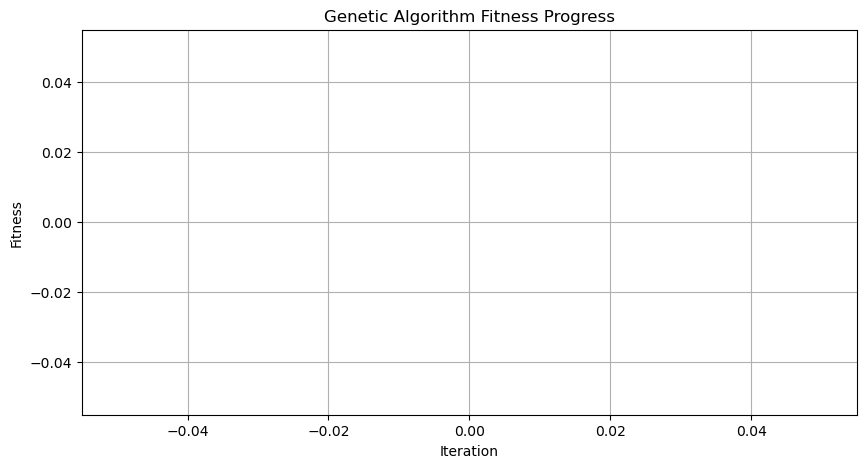

In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from matplotlib import pyplot as plt



current_mode = "Universal Screening"
# Input widgets for the simulation parameters
index_case_lower_age_band = widgets.IntText(value=1, description='Index Case Lower Age Band:')
index_case_upper_age_band = widgets.IntText(value=2, description='Index Case Upper Age Band:')
screening_start_year = widgets.IntText(value=1993, description='Screening Start Year:')
screening_end_year = widgets.IntText(value=2023, description='Screening End Year:')
index_case_participation_rate = widgets.IntText(value=100, description='Index Case Participation Rate:')
relatives_participation_rate = widgets.IntText(value=100, description="Relative's Participation Rate:")
sensitivity = widgets.FloatText(value=96.0, description='Sensitivity:')
specificity = widgets.FloatText(value=99.0, description='Specificity:')


current_mode # Buttons for different simulation modes and their click handlers
def set_universal_screening_parameters(button):
    global current_mode
    current_mode = "Universal Screening"
    index_case_lower_age_band.value = 1
    index_case_upper_age_band.value = 2
    screening_start_year.value = 2021
    screening_end_year.value = 2023
    index_case_participation_rate.value = 100
    relatives_participation_rate.value = 100
    print(current_mode)

def set_famcat2_parameters(button):
    global current_mode 
    current_mode = "FAMCAT2"
    index_case_lower_age_band.value = 1
    index_case_upper_age_band.value = 2
    screening_start_year.value = 1993
    screening_end_year.value = 2023
    index_case_participation_rate.value = 10
    relatives_participation_rate.value = 100
    print(current_mode)

def set_custom_mode_parameters(button):
    global current_mode
    current_mode = "Custom"
    index_case_lower_age_band.value = 0
    index_case_upper_age_band.value = 0
    screening_start_year.value = 0
    screening_end_year.value = 0
    index_case_participation_rate.value = 0
    relatives_participation_rate.value = 0
    print(current_mode)

def on_accept_button_click(button):
    print("Accepted!")

universal_screening_button = widgets.Button(description="Universal Screening")
famcat2_button = widgets.Button(description="FAMCAT2")
custom_mode_button = widgets.Button(description="Custom Mode")
accept_button = widgets.Button(description="Accept")

universal_screening_button.on_click(set_universal_screening_parameters)
famcat2_button.on_click(set_famcat2_parameters)
custom_mode_button.on_click(set_custom_mode_parameters)
accept_button.on_click(on_accept_button_click)

# Create the Progress Bar
progress_bar = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Optimising:',
    bar_style='',  # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

# UI layout
input_boxes = widgets.VBox([
    index_case_lower_age_band,
    index_case_upper_age_band,
    screening_start_year,
    screening_end_year,
    index_case_participation_rate,
    relatives_participation_rate,
    sensitivity,
    specificity,
    accept_button,
    progress_bar
])

simulation_mode_buttons = widgets.HBox([
    universal_screening_button,
    famcat2_button,
    custom_mode_button
])



# Genetic Algorithm Functions
def fitness(ic_rate, rel_rate):
    global current_mode
    print(current_mode)
    test_instance = run(ic_rate, screening_start_year.value, screening_end_year.value, 
                        index_case_lower_age_band.value, index_case_upper_age_band.value,
                        rel_rate, 'first', sensitivity.value, specificity.value)
    results = Simulate(test_instance)
    
    def normalise(cost1, cost2):
        objectives = np.array([cost1, cost2])
        min_values = np.min(objectives, axis=1)
        max_values = np.max(objectives, axis=1)
        
        denominator = max_values - min_values
        
        if not np.any(denominator == 0):
            normalised_objectives = (objectives - min_values[:, np.newaxis]) / (max_values - min_values)[:, np.newaxis]
        else:
            normalised_objectives = np.zeros_like(objectives)
        
        
        return normalised_objectives[0], normalised_objectives[1]
        
    if current_mode == "Universal Screening":
        print("Current mode = {}".format(current_mode))
        
        first_US_appointment = 17.07
        second_US_appointment = 8.54
        index_case_consultation_for_CT = 25.61
        NGS_screen = 263
        initial_relative_CT_appointment = 17.07
        genetic_test_for_known_mutation = 79
        results_appointment_invitation_letter = 1.09
        administrator_time_per_letter = 4.92
        initial_specialist_review_adult = 239.96
        initial_specialist_review_child = 316.70
        lipid_profile_test = 3
        liver_function_tests = 1
        creatinine_kinase_test = 2
        blood_sampling_appointment_adult = 3.76
        blood_sampling_appointment_child = 5.01
        primary_care_followup_adult = 37
        secondary_care_followup_adult = 100.52
        secondary_care_followup_child = 156.73

        everyone = [first_US_appointment, results_appointment_invitation_letter,
                    administrator_time_per_letter, lipid_profile_test,
                    liver_function_tests, creatinine_kinase_test]

        TP = [second_US_appointment, index_case_consultation_for_CT,
              NGS_screen, initial_specialist_review_child,
              blood_sampling_appointment_child, secondary_care_followup_child]

        TPr = [second_US_appointment, index_case_consultation_for_CT,
              genetic_test_for_known_mutation,
              ((initial_specialist_review_child + initial_specialist_review_adult) / 2),
              blood_sampling_appointment_child,
              ((secondary_care_followup_child + secondary_care_followup_child) / 2)]

        relatives = [initial_relative_CT_appointment,
                     genetic_test_for_known_mutation,
                     initial_specialist_review_adult,
                     blood_sampling_appointment_adult,
                     primary_care_followup_adult,
                     ((secondary_care_followup_child + secondary_care_followup_child) / 2)]

        TruePositives = sum(everyone) + sum(TP)
        TrueNegatives = sum(everyone) + sum(relatives)
        TruePositives_relatives = sum(everyone) + sum(TPr)
        FalseNegatives = sum(everyone)

        tp = np.array(results[26]) * TruePositives
        tp_relatives = np.array(results[22]) * TruePositives_relatives
        tn = np.array(results[27]) * TrueNegatives
        fn = results[25]

        total_cost = np.array(tp) + np.array(tp_relatives) + np.array(tn)
        Detection_Rate = np.array(results[17])
        fn = np.array(results[25])

        # Placeholder for cost calculations
        ScreeningCosts = [total_cost, Detection_Rate, fn]

                
        if type(ScreeningCosts[0]) == None or type(ScreeningCosts[1]) == None:
            return 0
        else:
            average_cost = ScreeningCosts[0]
            average_detection_rate = ScreeningCosts[1]
            

            objective = ScreeningCosts[0][-1]/ScreeningCosts[1][-1]
            print("Objective = {}".format(objective))

            return objective

        
    

    else:
        print("2")
        
    return ic_rate + rel_rate

    
    
    

def mutate(value, mutation_probability):
    if np.random.rand() < mutation_probability:
        mutation = np.random.randint(-10, 10)
        mutated_value = value + mutation
        return max(1, min(mutated_value, 100))  # Ensure the mutated value is between 1 and 100
    return value

def genetic_optimization():
    max_iterations = 100
    population_size = 20
    mutation_probability = 0.1
    elitism_ratio = 0.02
    crossover_probability = 0.5
    parents_portion = 0.5
    crossover_type = "Uniform"

    population = [(np.random.randint(1, 101), np.random.randint(1, 101)) for _ in range(population_size)]
    best_solution = None
    best_fitness = float('-inf')

    for iteration in range(max_iterations):
        fitness_values = [fitness(ic_rate, rel_rate) for ic_rate, rel_rate in population]
        best_fitness_idx = np.argmax(fitness_values)  # Find the index of the maximum fitness value
        current_best_fitness = fitness_values[best_fitness_idx]  # Get the current best fitness value

        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_solution = population[best_fitness_idx]
            best_ic_rate, best_rel_rate = best_solution

        num_elites = int(elitism_ratio * population_size)
        elites = sorted(zip(population, fitness_values), key=lambda x: x[1], reverse=True)[:num_elites]

        
        num_parents = max(int(parents_portion * population_size), 2)  
        parents = np.array(population)[np.argsort(fitness_values)[-num_parents:]]
        children = []
        for _ in range(population_size - num_elites):
            if np.random.rand() < crossover_probability:
                parent1, parent2 = parents[np.random.choice(num_parents, 2, replace=False)]
                if crossover_type == "Uniform":
                    child = (parent1[0] if np.random.rand() < 0.5 else parent2[0],
                             parent1[1] if np.random.rand() < 0.5 else parent2[1])
                children.append(child)
            else:
                children.append(parents[np.random.choice(num_parents)])

        mutated_children = [(mutate(child[0], mutation_probability), mutate(child[1], mutation_probability)) for child in children]
        population = [x[0] for x in elites] + mutated_children

        # Print updates
        print(f"Iteration {iteration + 1}:")
        print(f"Best Fitness: {best_fitness}")
        print(f"Best Solution: {best_solution}")

    return best_ic_rate, best_rel_rate, best_fitness


def plot_fitness_progress(iteration, fitness_history):
    plt.figure(figsize=(10, 5))
    plt.plot(range(iteration + 1), fitness_history, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('Genetic Algorithm Fitness Progress')
    plt.grid(True)
    plt.show()

fitness_history = []




# Create initial empty plot
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm Fitness Progress')
plt.grid(True)

# Create a function to update the plot
def update_plot(iteration, fitness_history):
    line.set_data(range(iteration + 1), fitness_history)
    ax.relim()
    ax.autoscale_view()
    clear_output(wait=True)
    display(fig)

output_widget = widgets.Output()
def display_optimal_values(ic_rate, rel_rate, fitness):
    with output_widget:
        clear_output(wait=True)
        print(f"Optimal Index Case Participation Rate: {ic_rate}")
        print(f"Optimal Relative's Participation Rate: {rel_rate}")
        print(f"Optimal Fitness Value: {fitness}")
    
    
    
# Fixing the unpacking issue in on_optimize_button_click_updated function
def on_optimize_button_click_updated(button):
    max_iterations = 100
    fitness_history.clear()
    
    for iteration in range(max_iterations):
        best_ic_rate, best_rel_rate, best_fitness = genetic_optimization()  # Unpack all three values here
        
        fitness_history.append(best_fitness)
        update_plot(iteration, fitness_history)

        with output:
            clear_output(wait=True)
            display_optimal_values(best_ic_rate, best_rel_rate, best_fitness)
        progress_bar.value = iteration + 1
    display_optimal_values(best_ic_rate, best_rel_rate, best_fitness)

# Initializing the optimize_button
optimize_button = widgets.Button(description="Optimise")
optimize_button.on_click(on_optimize_button_click_updated)

# Display everything
display(simulation_mode_buttons, input_boxes, progress_bar, optimize_button)